<a href="https://colab.research.google.com/github/Angelalena23/Python-Projects/blob/main/Mutual_Fund_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A) Business Background

Indonesian investment startup which makes an application that can buy and sell mutual funds. The mutual funds consist of:


1.   Stocks mutual funds
2.   Bond mutual funds
3.   Money market mutual funds
4.   Mixed-investment mutual funds

Our goal is to provide recommendations to the marketing team on what thematic campaigns are right to be implemented next month. By understanding the demographics of users, trends on transactions, and transaction trends for each product.

**Daily User Transaction:**
https://docs.google.com/spreadsheets/d/1xk6NF0FuDANBUSQoYgmsRnJYjqCNKPlU3lIbDwkC_rk/edit?usp=sharing

**Users:**
https://docs.google.com/spreadsheets/d/1-PUluI5I3ylkY-ISYFFYKKyEzGHKQy34_vVe_-lazdk/edit?usp=sharing

**Data Dictionary:**
https://docs.google.com/spreadsheets/d/1gnDzstdzbwNRp5PU-5SirDQBnOvYfMgWezxvq4UDp-A/edit?usp=sharing

# B) Data Preparation

###### Import Library

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization

##### Import Dataset

###### Daily User Transaction (Spreadsheet)

In [ ]:
#Data Daily User Transaction
sheet_url = 'https://docs.google.com/spreadsheets/d/1xk6NF0FuDANBUSQoYgmsRnJYjqCNKPlU3lIbDwkC_rk/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
ut = pd.read_csv(sheet_url_trf)
ut.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


###### Users (Spreadsheet)

In [ ]:
#Data Users
sheet_url = 'https://docs.google.com/spreadsheets/d/1-PUluI5I3ylkY-ISYFFYKKyEzGHKQy34_vVe_-lazdk/edit#gid=0'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
users = pd.read_csv(sheet_url_trf)
users.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji,0,0,0
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,13500000,8500000,0


# C) Data Cleaning

Steps to do:
*   Merge the dataset
*   Check Data Type
*   Check Values and Typos
*   Treating missing values 
*   Check Duplicates
*   Check Outliers 




### Merge the dataset

In [ ]:
#Merge data
df_merge = users.merge(ut, how = 'inner', left_on=['user_id'], right_on=['user_id'])

df_merge.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,...,NaN,NaN,NaN,0,0,190000.0,40000.0,270000.0,NaN,500000
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,...,NaN,NaN,NaN,0,0,190000.0,40000.0,270000.0,NaN,500000
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,...,NaN,NaN,NaN,0,0,190000.0,40000.0,270000.0,NaN,500000
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,...,NaN,NaN,NaN,0,0,190000.0,40000.0,270000.0,NaN,500000
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji,600000,100000,...,NaN,NaN,NaN,0,0,190000.0,40000.0,270000.0,NaN,500000


In [ ]:
#Make a copy of the original data for data cleaning
df = df_merge.copy()

### Check Data Type

In [ ]:
df.shape #Check how much column and rows

(158811, 27)

In [ ]:
df.info() #Check table info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   registration_import_datetime              158811 non-null  object 
 2   user_gender                               158811 non-null  object 
 3   user_age                                  158811 non-null  int64  
 4   user_occupation                           158811 non-null  object 
 5   user_income_range                         158811 non-null  object 
 6   referral_code_used                        51371 non-null   object 
 7   user_income_source                        158811 non-null  object 
 8   end_of_month_invested_amount              158811 non-null  int64  
 9   total_buy_amount                          158811 non-null  int64  
 10  total_sell_amount   

In [ ]:
df.isnull().sum() #Check how much null values exist

user_id                                          0
registration_import_datetime                     0
user_gender                                      0
user_age                                         0
user_occupation                                  0
user_income_range                                0
referral_code_used                          107440
user_income_source                               0
end_of_month_invested_amount                     0
total_buy_amount                                 0
total_sell_amount                                0
date                                             0
buy_saham_transaction_amount                 59780
sell_saham_transaction_amount               157003
buy_pasar_uang_transaction_amount            36548
sell_pasar_uang_transaction_amount          156801
buy_pendapatan_tetap_transaction_amount      59895
sell_pendapatan_tetap_transaction_amount    157230
buy_campuran_transaction_amount             153739
sell_campuran_transaction_amoun

In [ ]:
#Change user_id data type into string
df['user_id'] = df['user_id'].astype(str)   

In [ ]:
#Change registration_import_datetime data type into datetime
df_col_date = ['date','registration_import_datetime']

for i in df_col_date :
  df[i] = pd.to_datetime(df[i]) 


In [ ]:
#Change data type from string into float
df_col_num = ['end_of_month_invested_amount', 'total_buy_amount', 'total_sell_amount','total_buy_transaction_amount', 'total_sell_transaction_amount', 'total_invested_amount']

for val in df_col_num:
  df[val] = df[val].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        51371 non-null   object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  float64       
 9   total_buy_amoun

Insight : 
* user_id can be change into string 
* registration_import_datetime and date can be change into datetime
* end_of_month_invested_amount,total_buy_amount, total_sell_amount, total_buy_transaction_amount,total_sell_transaction_amount, and total_invested_amount can be change into float
* referral_code_used, 107440 row null
* buy_saham_transaction_amount, 59780 row null
* sell_saham_transaction_amount, 157003 row null
*   buy_pasar_uang_transaction_amount, 36548 row null
*   sell_pasar_uang_transaction_amount, 156801 row null
*   buy_pendapatan_tetap_transaction_amount,59895 row null
*   sell_pendapatan_tetap_transaction_amount,157230 row null
*   buy_campuran_transaction_amount, 153739 row null
* sell_campuran_transaction_amount,158765 row null
* saham_invested_amount,52519 row null
* pasar_uang_invested_amount, 27730 row null
* pendapatan_tetap_invested_amount, 52865 row null
* campuran_invested_amount, 153459 row null






### Check Values and Typos

In [ ]:
print(df['user_income_range'].unique())

['> Rp 50 Juta - 100 Juta' '> Rp 500 Juta - 1 Miliar' '< 10 Juta'
 '> Rp 100 Juta - 500 Juta' 'Rp 10 Juta - 50 Juta' '> Rp 1 Miliar']


In [ ]:
#Replace several characters using str.replace
df['user_income_range'] = df['user_income_range'].str.replace('> Rp 500 Juta - 1 Miliar', 'Rp 500 Juta - 1 Miliar').str.replace('> Rp 50 Juta - 100 Juta', 'Rp 50 Juta - 100 Juta').str.replace('< 10 Juta', '< Rp 10 Juta').str.replace('> Rp 100 Juta - 500 Juta', 'Rp 100 Juta - 500 Juta')

print(df['user_income_range'].unique())

['Rp 50 Juta - 100 Juta' 'Rp 500 Juta - 1 Miliar' '< Rp 10 Juta'
 'Rp 100 Juta - 500 Juta' 'Rp 10 Juta - 50 Juta' '> Rp 1 Miliar']


In [ ]:
#Checking typo in user_gender
df['user_gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
#Checking typo in refferal_code_used
df['referral_code_used'].unique()

array([nan, 'used referral'], dtype=object)

In [ ]:
#Checking typo in user_occupation
df['user_occupation'].unique()

array(['IRT', 'PNS', 'Swasta', 'Others', 'Pengusaha', 'Pensiunan', 'Guru',
       'TNI/Polisi', 'Pelajar'], dtype=object)

In [ ]:
#Checking typo in user_income_source
df['user_income_source'].unique()

array(['Gaji', 'Lainnya', 'Keuntungan Bisnis', 'Dari Orang Tua / Anak',
       'Undian', 'Tabungan', 'Warisan', 'Hasil Investasi',
       'Dari Suami / istri', 'Bunga Simpanan'], dtype=object)

Insight:
There is no typos in this dataset

### Check Duplicated

In [ ]:
#Check the duplicate
df[df.duplicated()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount


Insight: There is no duplicate in this data set

### Treating Missing Values

In [ ]:
#Replace null value in refferal_code_used to be not using refferal
df['referral_code_used'] = df['referral_code_used'].fillna('not using refferal')

df['referral_code_used'].value_counts()

not using refferal    107440
used referral          51371
Name: referral_code_used, dtype: int64

In [ ]:
#Mengabsolute-kan nilai (-) pada tabel sell
df[['total_sell_amount','sell_saham_transaction_amount','sell_pasar_uang_transaction_amount','sell_pendapatan_tetap_transaction_amount','sell_campuran_transaction_amount','total_sell_transaction_amount']] = df[['total_sell_amount','sell_saham_transaction_amount','sell_pasar_uang_transaction_amount','sell_pendapatan_tetap_transaction_amount','sell_campuran_transaction_amount','total_sell_transaction_amount']].apply(np.abs)

In [ ]:
#Replace 0 value into Nan
df[['end_of_month_invested_amount','total_buy_amount','total_sell_amount',
    'buy_saham_transaction_amount', 'sell_saham_transaction_amount',
       'buy_pasar_uang_transaction_amount',
       'sell_pasar_uang_transaction_amount',
       'buy_pendapatan_tetap_transaction_amount',
       'sell_pendapatan_tetap_transaction_amount',
       'buy_campuran_transaction_amount','sell_campuran_transaction_amount',
       'total_buy_transaction_amount','total_sell_transaction_amount',
       'saham_invested_amount','pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount','campuran_invested_amount'
       ]] = df[['end_of_month_invested_amount',
       'total_buy_amount','total_sell_amount','buy_saham_transaction_amount', 
       'sell_saham_transaction_amount',
       'buy_pasar_uang_transaction_amount',
       'sell_pasar_uang_transaction_amount',
       'buy_pendapatan_tetap_transaction_amount',
       'sell_pendapatan_tetap_transaction_amount',
       'buy_campuran_transaction_amount','sell_campuran_transaction_amount',
       'total_buy_transaction_amount','total_sell_transaction_amount',
       'saham_invested_amount','pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount','campuran_invested_amount'
       ]].replace(0, np.nan)

In [ ]:
#Replace null value in end_of_month_invested_amount to be 0
df['end_of_month_invested_amount'] = df['end_of_month_invested_amount'].fillna(0)


In [ ]:
df['total_invested_amount'] = df['total_invested_amount'].fillna(0)

In [ ]:
df['end_of_month_invested_amount'].value_counts()

0.0           44549
100000.0      16948
200000.0       8759
10000.0        8574
500000.0       4070
              ...  
582000.0          1
30779.0           1
83400000.0        1
119000.0          1
260881.0          1
Name: end_of_month_invested_amount, Length: 1042, dtype: int64

In [ ]:
df['end_of_month_invested_amount'].value_counts()

0.0           44549
100000.0      16948
200000.0       8759
10000.0        8574
500000.0       4070
              ...  
582000.0          1
30779.0           1
83400000.0        1
119000.0          1
260881.0          1
Name: end_of_month_invested_amount, Length: 1042, dtype: int64

In [ ]:
df.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0
4,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0


## Cleaned data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  float64       
 9   total_buy_amoun

##Boxplot

In [ ]:
#Checking numerical column
numerical_column = ['user_age','end_of_month_invested_amount','total_buy_amount','total_sell_amount','buy_saham_transaction_amount','sell_saham_transaction_amount',
       'buy_pasar_uang_transaction_amount',
       'sell_pasar_uang_transaction_amount',
       'buy_pendapatan_tetap_transaction_amount',
       'sell_pendapatan_tetap_transaction_amount',
       'buy_campuran_transaction_amount','sell_campuran_transaction_amount',
       'total_buy_transaction_amount','total_sell_transaction_amount',
       'saham_invested_amount','pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount','campuran_invested_amount',
       'total_invested_amount']
for index, value in enumerate (numerical_column):
  print(index,value)

0 user_age
1 end_of_month_invested_amount
2 total_buy_amount
3 total_sell_amount
4 buy_saham_transaction_amount
5 sell_saham_transaction_amount
6 buy_pasar_uang_transaction_amount
7 sell_pasar_uang_transaction_amount
8 buy_pendapatan_tetap_transaction_amount
9 sell_pendapatan_tetap_transaction_amount
10 buy_campuran_transaction_amount
11 sell_campuran_transaction_amount
12 total_buy_transaction_amount
13 total_sell_transaction_amount
14 saham_invested_amount
15 pasar_uang_invested_amount
16 pendapatan_tetap_invested_amount
17 campuran_invested_amount
18 total_invested_amount


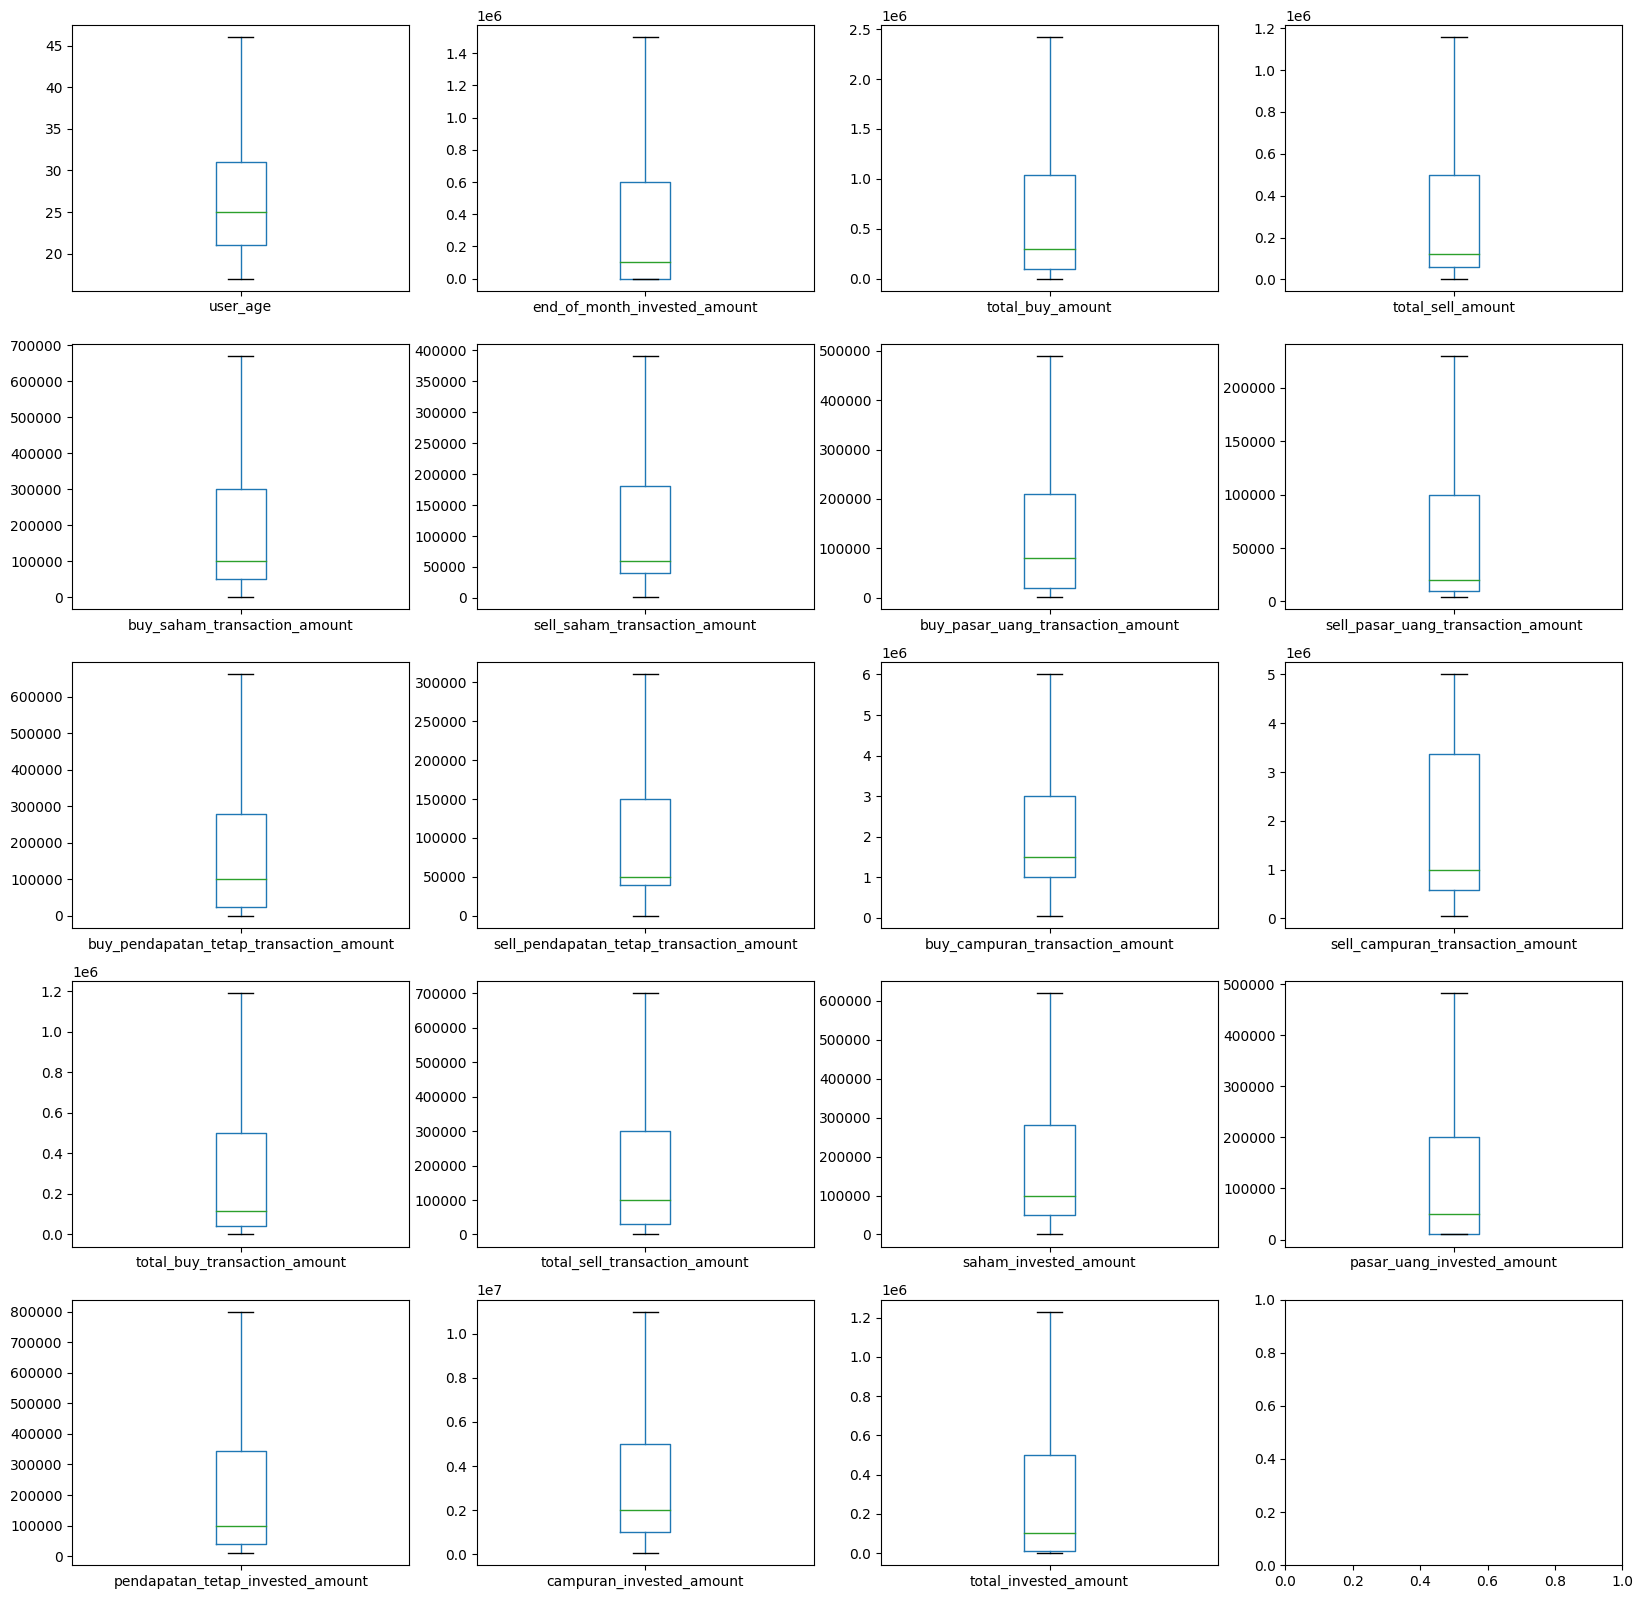

In [ ]:
#Show the boxplot in every numerical column
numerical_column = ['user_age','end_of_month_invested_amount','total_buy_amount','total_sell_amount','buy_saham_transaction_amount', 'sell_saham_transaction_amount',
       'buy_pasar_uang_transaction_amount',
       'sell_pasar_uang_transaction_amount',
       'buy_pendapatan_tetap_transaction_amount',
       'sell_pendapatan_tetap_transaction_amount',
       'buy_campuran_transaction_amount','sell_campuran_transaction_amount',
       'total_buy_transaction_amount','total_sell_transaction_amount',
       'saham_invested_amount','pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount','campuran_invested_amount',
       'total_invested_amount']

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))

for i,el in enumerate(numerical_column):
  a = df.boxplot (el, ax=axes.flatten()[i], grid=False, showfliers=False )
plt.show()


In [ ]:
df.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0
4,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0


##Outliers

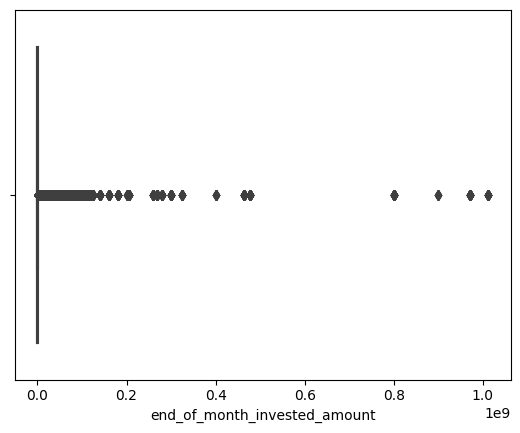

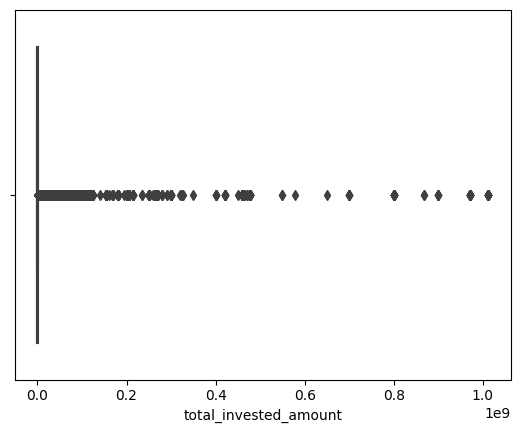

In [ ]:
#Checking the data distribution of total_invested_amount column and end_of_month_invested_amount
numeric_cols = ['end_of_month_invested_amount', 'total_invested_amount']

for col in numeric_cols:
    sns.boxplot(data= df, x=col)
    plt.show()

We can see there are not outlier for the lower bound, but there is a lot of outlier detected based on the upper bound, which by looking with bare eye, the upper limit is around 1 billion.

In [ ]:
#Check the Q1,Q3,IQR,UB & LB

#eom = end_of_month_invested_amount
Q1_eom = df['end_of_month_invested_amount'].quantile(.25)
Q3_eom = df['end_of_month_invested_amount'].quantile(.75)

# IQR
IQR_eom = Q3_eom - Q1_eom
LB_eom = Q1_eom - (1.5 * IQR_eom)
UB_eom = Q3_eom + (1.5 * IQR_eom)
print('\nQ1:\n',Q1_eom)
print('\nQ3:\n',Q3_eom)
print('\nIQR:\n',IQR_eom)
print('\nMin:\n',LB_eom)
print('\nMax:\n',UB_eom)



Q1:
 0.0

Q3:
 600000.0

IQR:
 600000.0

Min:
 -900000.0

Max:
 1500000.0


Insight:

Based on the calculation of the quartiles and IQR for the 'end_of_month_invested_amount' column, it can be seen that lower bound of the amount of investment is -1,400,000 and the upper bound is 2,600,000. Data that is less than the lower bound or data that exceeds the upper bound are called outliers.By replacing value 0 with NaN we can get Q1 with result 100,000 instead of 0. This information can be used to identify outliers or extreme values in the data


In [ ]:
#Check the Q1,Q3,IQR,UB & LB

#tia = total_invested_amount
Q1_tia = df['total_invested_amount'].quantile(.25)
Q3_tia = df['total_invested_amount'].quantile(.75)

# IQR
IQR_tia = Q3_tia - Q1_tia
LB_tia = Q1_tia - (1.5 * IQR_tia)
UB_tia = Q3_tia + (1.5 * IQR_tia)
print('\nQ1:\n',Q1_tia)
print('\nQ3:\n',Q3_tia)
print('\nIQR:\n',IQR_tia)
print('\nMin:\n',LB_tia)
print('\nMax:\n',UB_tia)


Q1:
 10000.0

Q3:
 500000.0

IQR:
 490000.0

Min:
 -725000.0

Max:
 1235000.0


Insight:

Based on the calculation of the quartiles and IQR for the 'total_invested_amount' column, it can be seen that lower bound of the amount of investment is -725000 and the upper bound is 1235000. Data that is less than the lower bound or data that exceeds the upper bound are called outliers.By replacing value 0 with NaN we can get Q1 with result 10000 instead of 0. This information can be used to identify outliers or extreme values in the data


In [ ]:
#Removing/Excluding the outlier and assign it on new variable "df"
df_clean_total_invested_amount = df[~((df["total_invested_amount"] < LB_tia) | (df["total_invested_amount"] > UB_tia))]
df_clean = df_clean_total_invested_amount[~((df_clean_total_invested_amount["end_of_month_invested_amount"] < LB_eom) | (df_clean_total_invested_amount["end_of_month_invested_amount"] > UB_eom))]
df_clean.shape

(132245, 27)

In [ ]:
#Checking if it is really clean

df_clean[(df_clean["total_invested_amount"] < LB_tia)].sort_values("total_invested_amount",ascending = False)
# df_clean[(df_clean["total_invested_amount"] > UB_tia)].sort_values("total_invested_amount",ascending = False)
# df_clean[(df_clean["end_of_month_invested_amount"] < LB_eom)].sort_values("end_of_month_invested_amount",ascending = False)
# df_clean[(df_clean["end_of_month_invested_amount"] > UB_eom)].sort_values("end_of_month_invested_amount",ascending = False)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount


<Axes: xlabel='total_invested_amount'>

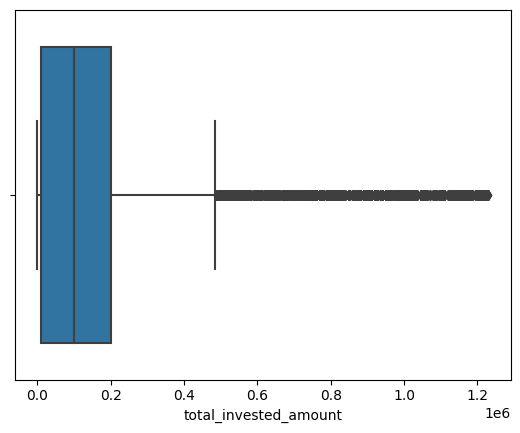

In [ ]:
#Checking the data distribution of total_invested_amount column
sns.boxplot(data = df_clean , x ="total_invested_amount")

It is showing a better distribution, with little noise

<Axes: xlabel='end_of_month_invested_amount'>

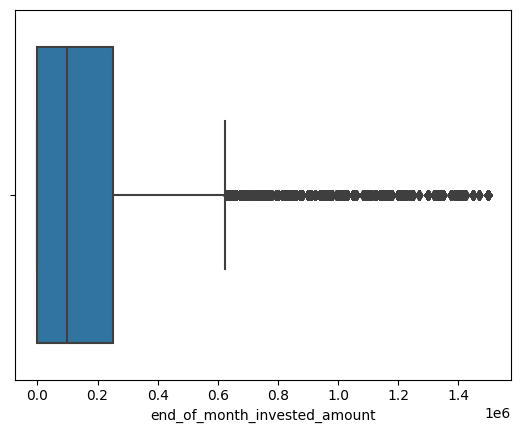

In [ ]:
#Checking the data distribution of end_of_month_invested_amount column
sns.boxplot(data = df_clean , x ="end_of_month_invested_amount")

It is showing a better distribution, with little noise

# D) EDA

In [ ]:
#Preparing a copy of df_clean for EDA
df_eda = df.copy()
df_eda.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0
4,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.0,100000.0,...,NaN,NaN,NaN,NaN,NaN,190000.0,40000.0,270000.0,NaN,500000.0


In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  float64       
 9   total_buy_amoun

####Descriptive Statistics:
* How many users do we have in the data?
* How is the demographic in the data?
* How many users buy products in each mutual fund?

In [ ]:
df[['user_gender', 'user_occupation','user_income_range','referral_code_used','user_income_source']].describe()

,user_gender,user_occupation,user_income_range,referral_code_used,user_income_source
count,158811,158811,158811,158811,158811
unique,2,9,6,2,10
top,Male,Pelajar,< Rp 10 Juta,not using refferal,Gaji
freq,97149,88865,68500,107440,99611


Insight:
From the table above we can conclude that the most dominant user gender is male,the most users occuption are students and the most income source from salary with income range < 10 jt. User mostly not using refferal when sign up in this app.

### Descriptive information about numeric variable

In [ ]:
#Descriptive analysis after treating the outlier
# Rounds a decimal number to 3 digits after a comma
pd.set_option('display.float_format', lambda x: '%.2f' % x)

numeric = ['end_of_month_invested_amount', 'total_buy_amount',
            'total_sell_amount', 'buy_saham_transaction_amount',
            'sell_saham_transaction_amount', 'buy_pasar_uang_transaction_amount',
            'sell_pasar_uang_transaction_amount', 'buy_pendapatan_tetap_transaction_amount',
            'sell_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount', 
            'sell_campuran_transaction_amount', 'total_buy_transaction_amount', 
            'total_sell_transaction_amount', 'saham_invested_amount', 'pasar_uang_invested_amount', 
            'pendapatan_tetap_invested_amount', 'campuran_invested_amount', 'total_invested_amount'
]

desc_eda = df_eda[numeric].describe()
desc_eda.loc['kurtosis'] = df_eda[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_eda[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_eda[numeric].var() #show variance statistic
desc_eda.round(2)
desc_eda

,end_of_month_invested_amount,total_buy_amount,total_sell_amount,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,158811.00,81333.00,58639.00,3471.00,1808.00,4426.00,2010.00,4086.00,1581.00,131.00,46.00,7808.00,3321.00,82499.00,102452.00,85247.00,4831.00,158811.00
mean,3007509.97,3908502.01,1220398.02,458181.11,255045.37,841762.04,505661.71,1603317.91,487212.30,4056694.67,3862566.61,1587931.53,730341.09,569912.38,1075887.44,2215259.78,8652391.85,2442450.32
std,28083454.05,29457960.05,7877676.28,1685435.35,732455.44,6956940.77,5049577.96,14372315.29,3584982.34,7390676.26,8621733.31,12183449.45,4848918.35,2409248.82,15941851.66,26070956.06,26262357.67,24900778.45
min,0.00,114.00,4000.00,114.00,1108.00,928.00,4000.00,28.00,1.00,50000.00,50000.00,114.00,1.00,114.00,10000.00,10000.00,50000.00,0.00
25%,0.00,100000.00,60000.00,50000.00,40000.00,20000.00,10000.00,25000.00,40000.00,1000000.00,587500.00,40000.00,30502.00,50000.00,10000.00,40000.00,1000000.00,10000.00
50%,100000.00,300000.00,119265.00,100000.00,60000.00,80000.00,20000.00,100000.00,50500.00,1500000.00,1000000.00,115183.50,100000.00,100000.00,50000.00,100000.00,2000000.00,100000.00
75%,600000.00,1040000.00,500000.00,300000.00,180469.25,210000.00,100000.00,280000.00,150000.00,3000000.00,3375000.00,500000.00,299340.00,280000.00,200000.00,345000.00,5000000.00,500000.00
max,1012200000.00,799500000.00,185000000.00,50000000.00,11766799.00,289200000.00,185000000.00,400000000.00,92712405.00,50000000.00,50000000.00,450000000.00,185000000.00,61840000.00,1012200000.00,970000000.00,300000000.00,1012200000.00
kurtosis,780.86,489.35,298.87,299.38,86.92,858.28,966.90,460.12,439.24,22.12,19.88,615.09,753.68,216.95,3080.48,913.51,77.49,986.89
skewness,25.60,20.24,15.95,14.13,7.98,25.61,28.83,19.67,19.22,4.21,4.25,22.02,23.93,12.61,51.30,28.10,8.11,28.74


Insight:

*   The average end_of_month_invested_amount is 4,180,091.95 with a standard deviation of 33,034,465.62. This suggests that the data distribution is skewed right. On the other hand, total_buy_amount has an average of 3,908,502.01 with a standard deviation of 29,457,960.05, indicating that the total buy transactions are higher than the sell transactions.
*   The average of total_buy_transaction_amount 1,587,931.53 is significantly higher than the average of total_sell_transaction_amount 730,341.09, indicating that investors are more inclined to buy than to sell investments. There is also a significant difference in the amount invested in stocks and other assets such as money market, fixed income, and mixed.
*   Finally, the median of end_of_month_invested_amount, total_buy_amount, and total_sell_amount is smaller than their mean, indicating a skewed right distribution or there are potential outliers in the data.

<ipython-input-44-3d0c8a9a61e1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda['end_of_month_invested_amount'])
<ipython-input-44-3d0c8a9a61e1>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_eda['total_buy_amount'])
<ipython-input-44-3d0c8a9a61e1>:11: UserWarning: 

`distplot` is a

<Axes: xlabel='total_invested_amount', ylabel='Density'>

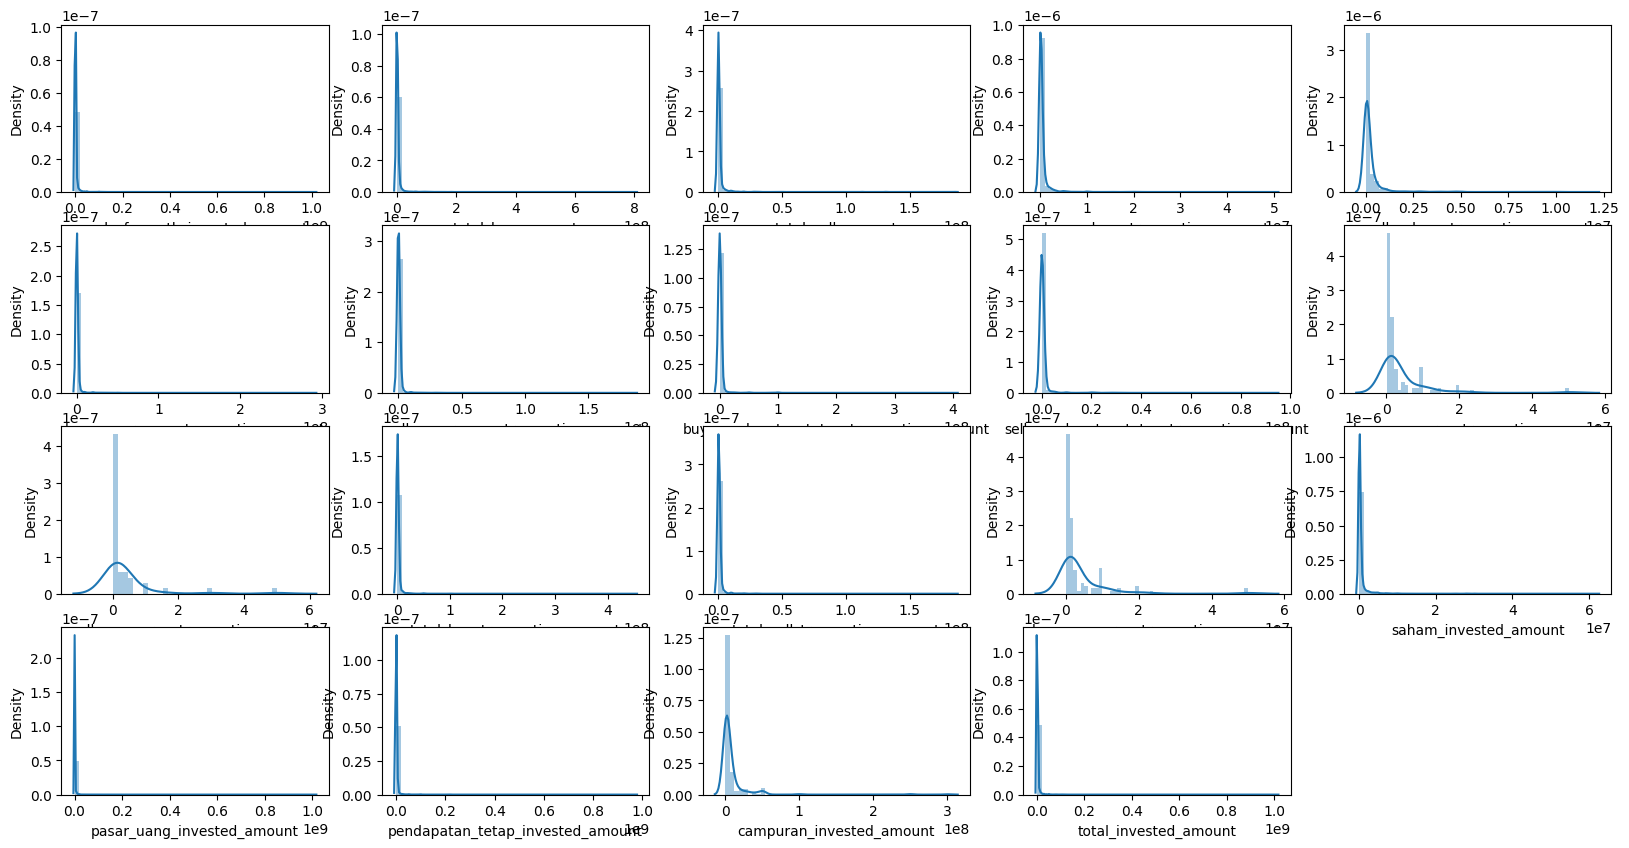

In [ ]:
#Plot data distribution
plt.figure(figsize=(20,10))

plt.subplot(4,5,1)
sns.distplot(df_eda['end_of_month_invested_amount'])

plt.subplot(4,5,2)
sns.distplot(df_eda['total_buy_amount'])

plt.subplot(4,5,3)
sns.distplot(df_eda['total_sell_amount'])

plt.subplot(4,5,4)
sns.distplot(df_eda['buy_saham_transaction_amount'])

plt.subplot(4,5,5)
sns.distplot(df_eda['sell_saham_transaction_amount'])

plt.subplot(4,5,6)
sns.distplot(df_eda['buy_pasar_uang_transaction_amount'])

plt.subplot(4,5,7)
sns.distplot(df_eda['sell_pasar_uang_transaction_amount'])

plt.subplot(4,5,8)
sns.distplot(df_eda['buy_pendapatan_tetap_transaction_amount'])

plt.subplot(4,5,9)
sns.distplot(df_eda['sell_pendapatan_tetap_transaction_amount'])

plt.subplot(4,5,10)
sns.distplot(df_eda['buy_campuran_transaction_amount'])

plt.subplot(4,5,11)
sns.distplot(df_eda['sell_campuran_transaction_amount'])

plt.subplot(4,5,12)
sns.distplot(df_eda['total_buy_transaction_amount'])

plt.subplot(4,5,13)
sns.distplot(df_eda['total_sell_transaction_amount'])

plt.subplot(4,5,14)
sns.distplot(df_eda['buy_campuran_transaction_amount'])

plt.subplot(4,5,15)
sns.distplot(df_eda['saham_invested_amount'])

plt.subplot(4,5,16)
sns.distplot(df_eda['pasar_uang_invested_amount'])

plt.subplot(4,5,17)
sns.distplot(df_eda['pendapatan_tetap_invested_amount'])

plt.subplot(4,5,18)
sns.distplot(df_eda['campuran_invested_amount'])

plt.subplot(4,5,19)
sns.distplot(df_eda['total_invested_amount'])

###Descriptive information about string variable

In [ ]:
# Perform descriptive statistical
str_var = ['user_id','user_gender', 'user_occupation', 'user_income_range', 'referral_code_used', 'user_income_source']
df_eda[str_var].describe()


,user_id,user_gender,user_occupation,user_income_range,referral_code_used,user_income_source
count,158811,158811,158811,158811,158811,158811
unique,8277,2,9,6,2,10
top,3740513,Male,Pelajar,< Rp 10 Juta,not using refferal,Gaji
freq,42,97149,88865,68500,107440,99611


Insight:

The dataset contains 158,811 rows and 6 columns: user_id, user_gender, user_occupation, user_income_range, referral_code_used, and user_income_source.

- There are 8,277 unique user_id, with the most frequent of user_id appearing 42 times.
- There are 2 unique user_gender, with "Male" being the most frequent gender.
- There are 9 unique user_occupation, with "Pelajar" being the most frequent occupation.
- There are 6 unique user_income_range, with "< Rp 10 Juta" being the most frequent income range.
- There are 2 unique referral_code_used, with "unused" being the most frequent referral code.
- There are 10 unique user_income_source, with "Gaji" being the most frequent income source.

The data suggests that the majority of users in the dataset are male, students, and have a monthly income below Rp 10 million. Most of the users did not use a referral code and receive income from salaries.

### Descriptive information about date type variable

In [ ]:
df_eda['date'].describe()

<ipython-input-46-a9667ca0b9c1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda['date'].describe()


count                  158811
unique                     42
top       2021-09-30 00:00:00
freq                     8277
first     2021-08-04 00:00:00
last      2021-09-30 00:00:00
Name: date, dtype: object

In [ ]:
df_eda['registration_import_datetime'].describe()

<ipython-input-47-9de327b2f30c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda['registration_import_datetime'].describe()


count                  158811
unique                   6581
top       2021-08-02 13:38:02
freq                      164
first     2021-08-01 00:11:14
last      2021-09-28 13:20:00
Name: registration_import_datetime, dtype: object

Insight:
The date starts from 2021-08-01 to 2021-09-30

###Number of *Customer*

QUESTION 1
* How many **users** do we have in the data?

In [ ]:
#Number of customer
df_eda['user_id'].count()

158811

Insight: 
There are 158811 unique users in this dataset

###Demograpic

QUESTION 2
* How is the demographic in the data?

######User Gender

In [ ]:
user_gender = df_eda.groupby('user_gender')['user_id'].count() #Count the id as users and group it by the loan status
user_gender = user_gender.reset_index()   #Reset the index to make it into a pandas dataframe
user_gender

,user_gender,user_id
0,Female,61662
1,Male,97149


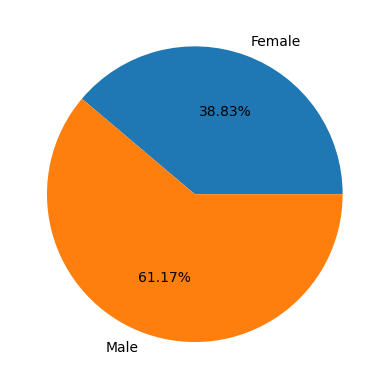

In [ ]:
plt.pie(user_gender['user_id'], labels = user_gender['user_gender'], autopct='%.2f%%') #Create a pie chart, autopct='%.2f%%' to show percent and 2 decimal
plt.show()

Insight:
The most users are male with percentage of 61.17% while female only have a percentage of 38.83%.

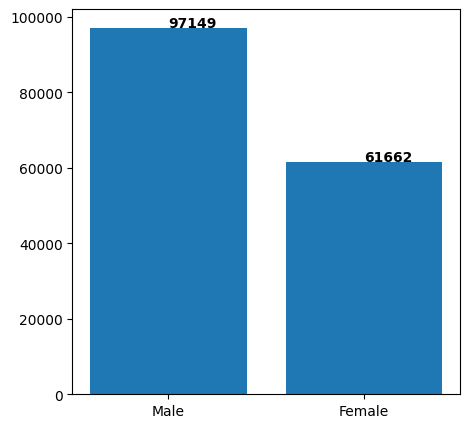

In [ ]:
fig = plt.figure(figsize =(5, 5))

K = user_gender.copy()

K.sort_values('user_id', ascending=False, inplace=True)
x = K['user_gender']
y = K['user_id']

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(i, v, str(vmil), fontweight='bold')

plt.bar(x, y)   #Create the bar chart
plt.show()

######User Occupation

In [ ]:
user_occupation = df_eda.groupby('user_occupation')['user_id'].count() #Count the id as users and group it by the loan status
user_occupation = user_occupation.reset_index()   #Reset the index to make it into a pandas dataframe
user_occupation

,user_occupation,user_id
0,Guru,1103
1,IRT,8123
2,Others,15812
3,PNS,2561
4,Pelajar,88865
5,Pengusaha,5835
6,Pensiunan,104
7,Swasta,35878
8,TNI/Polisi,530


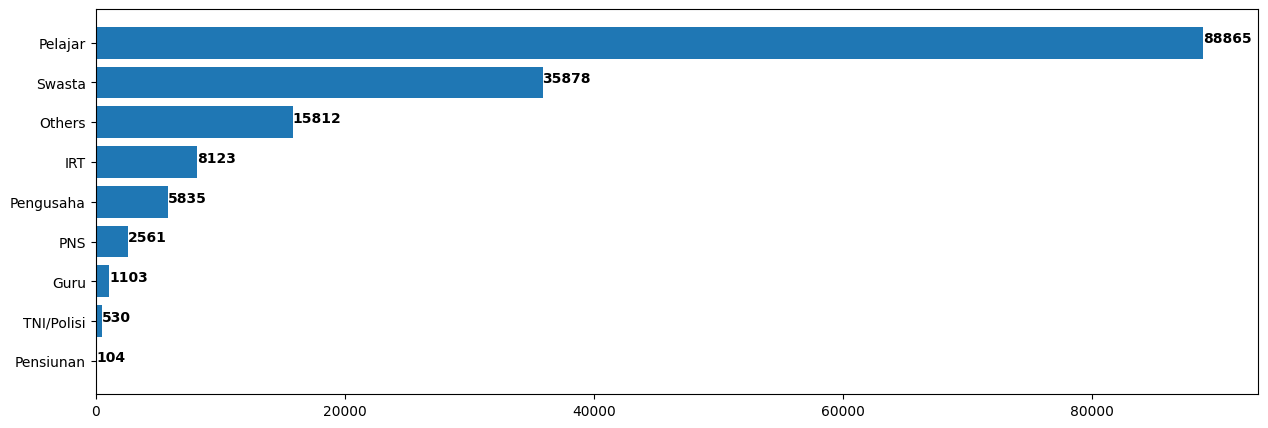

In [ ]:
fig = plt.figure(figsize =(15, 5))    #To create the canvas, figsize is showing size in inches (x,y)

K = user_occupation.copy()   

K.sort_values('user_id', ascending=True, inplace=True) #Sort the values descendingly
x = K['user_occupation']    #assign the x
y = K['user_id']         #assign the y

plt.barh(x, y)  #Create the horizontal bar chart

#To show the data labels
for i, v in enumerate(y):                           #enumerate add numeric besides the data, example = (0, ‘value’)
    vmil = round(v)                                 #round the y
    plt.text(v, i, str(vmil), fontweight='bold')    #add text plt.text(x,y,s,fontweight = '')

plt.show()

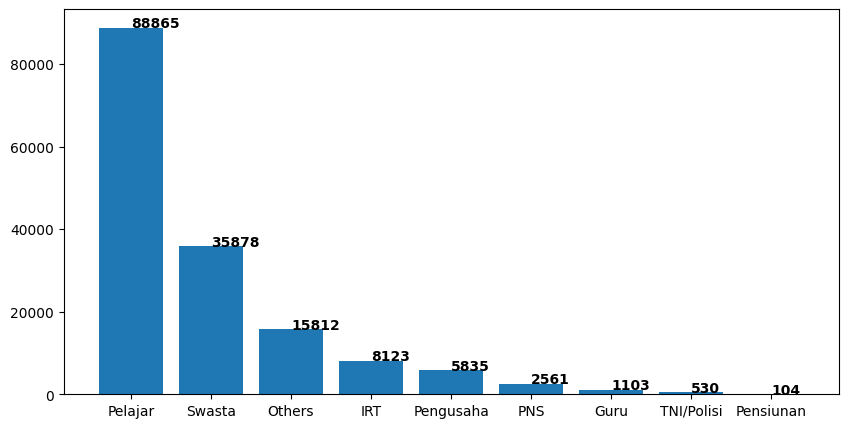

In [ ]:
fig = plt.figure(figsize =(10, 5))

K = user_occupation.copy()

K.sort_values('user_id', ascending=False, inplace=True)
x = K['user_occupation']
y = K['user_id']

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(i, v, str(vmil), fontweight='bold')

plt.bar(x, y)   #Create the bar chart
plt.show()

In [ ]:
#We need to create frequency and percentage table
user_occupation.head()

,user_occupation,user_id
0,Guru,1103
1,IRT,8123
2,Others,15812
3,PNS,2561
4,Pelajar,88865


Since it is not sorted we need to sort it first

In [ ]:
#Sort the values for cummulative percentage
user_occupation = user_occupation.sort_values('user_id',ascending = False)  
user_occupation

,user_occupation,user_id
4,Pelajar,88865
7,Swasta,35878
2,Others,15812
1,IRT,8123
5,Pengusaha,5835
3,PNS,2561
0,Guru,1103
8,TNI/Polisi,530
6,Pensiunan,104


Now we add percentage on the table

In [ ]:
#add new cum_percentage column
#add cumulative sum using .cumsum()
user_occupation['cum_percentage'] = np.round(user_occupation['user_id'].cumsum()/user_occupation['user_id'].sum() * 100,2)   
user_occupation

,user_occupation,user_id,cum_percentage
4,Pelajar,88865,55.96
7,Swasta,35878,78.55
2,Others,15812,88.50
1,IRT,8123,93.62
5,Pengusaha,5835,97.29
3,PNS,2561,98.91
0,Guru,1103,99.60
8,TNI/Polisi,530,99.93
6,Pensiunan,104,100.00


Now we create the chart

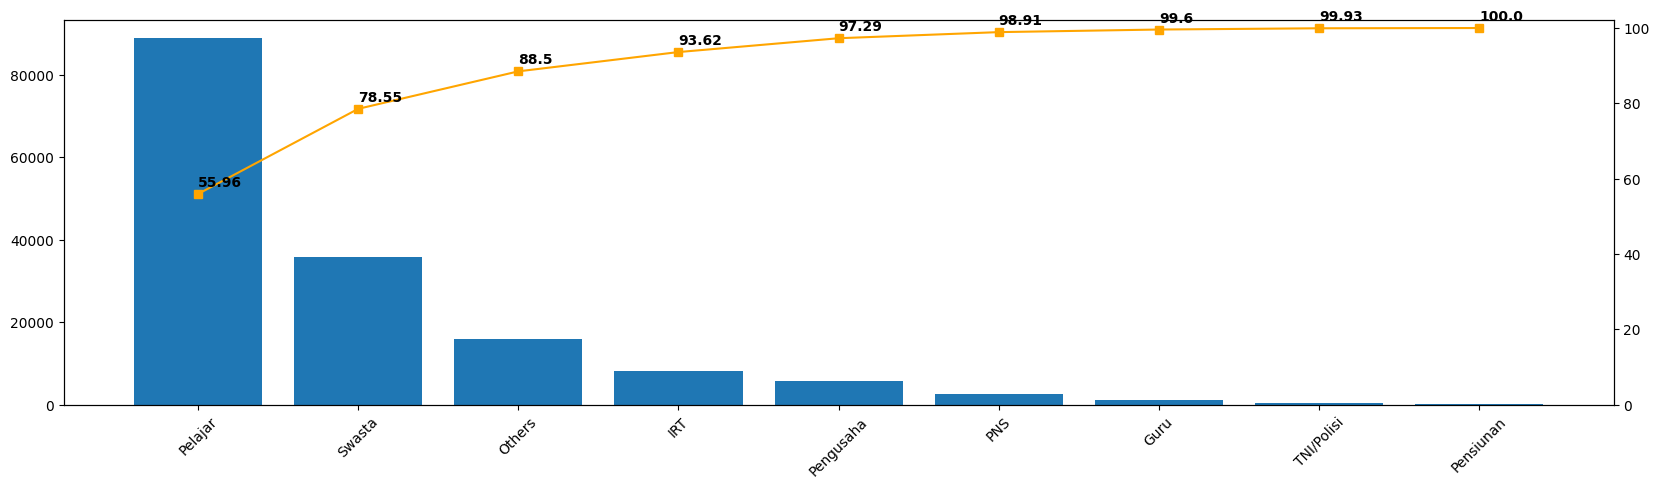

In [ ]:
fig,ax = plt.subplots(figsize=(20, 5))    #To create sub plot

x = user_occupation['user_occupation']
y_bar = user_occupation['user_id']
y_line = user_occupation['cum_percentage']

ax.bar(x,y_bar)   #To create the bar chart

plt.xticks(rotation = 45) 

ax2 = ax.twinx()     #To create combo chart, create twin axis of y, by sharing x axis
ax2.plot(x,y_line, marker = 's', color = 'orange')   #To create the line chart
ax2.set_ylim(ymin=0)    #To make the line chart start at 0

#To create the data labels
for i, v in enumerate(y_line):                                   
    vmil = round(v,2)
    plt.text(i, v+2, str(vmil), fontweight='bold')

plt.show()

Insight:Based on their occupation, users of this apps are dominated by students, swasta and others

######User Income Source

In [ ]:
user_income_source  = df_eda.groupby('user_income_source')['user_id'].count() #Count the id as users and group it by the loan status
user_income_source = user_income_source.reset_index()   #Reset the index to make it into a pandas dataframe
user_income_source

,user_income_source,user_id
0,Bunga Simpanan,220
1,Dari Orang Tua / Anak,8800
2,Dari Suami / istri,924
3,Gaji,99611
4,Hasil Investasi,1238
5,Keuntungan Bisnis,17456
6,Lainnya,4598
7,Tabungan,4933
8,Undian,20558
9,Warisan,473


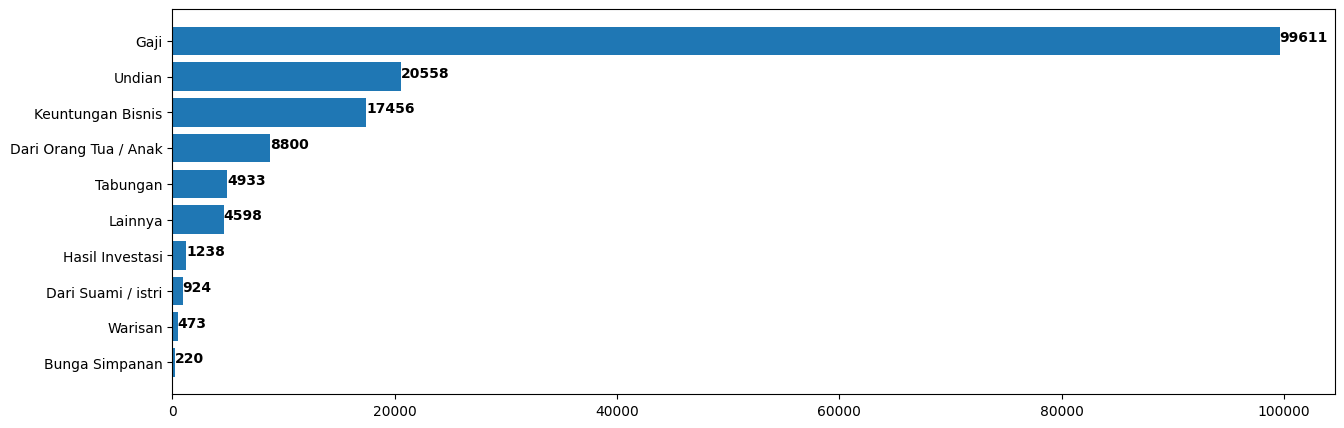

In [ ]:
fig = plt.figure(figsize =(15, 5))

K = user_income_source.copy()

K.sort_values('user_id', ascending=True, inplace=True)
x = K['user_income_source']
y = K['user_id']

plt.barh(x, y)

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(v, i, str(vmil), fontweight='bold')

plt.show()

Insight:Based on the source of income, ussers of this apps are dominated by income from gaji, undian, and keungungan bisnis

######User Income Range

In [ ]:
user_income_range = df_eda.groupby('user_income_range')['user_id'].count() #Count the id as users and group it by the loan status
user_income_range = user_income_range.reset_index()   #Reset the index to make it into a pandas dataframe
user_income_range

,user_income_range,user_id
0,< Rp 10 Juta,68500
1,> Rp 1 Miliar,348
2,Rp 10 Juta - 50 Juta,49849
3,Rp 100 Juta - 500 Juta,12648
4,Rp 50 Juta - 100 Juta,26489
5,Rp 500 Juta - 1 Miliar,977


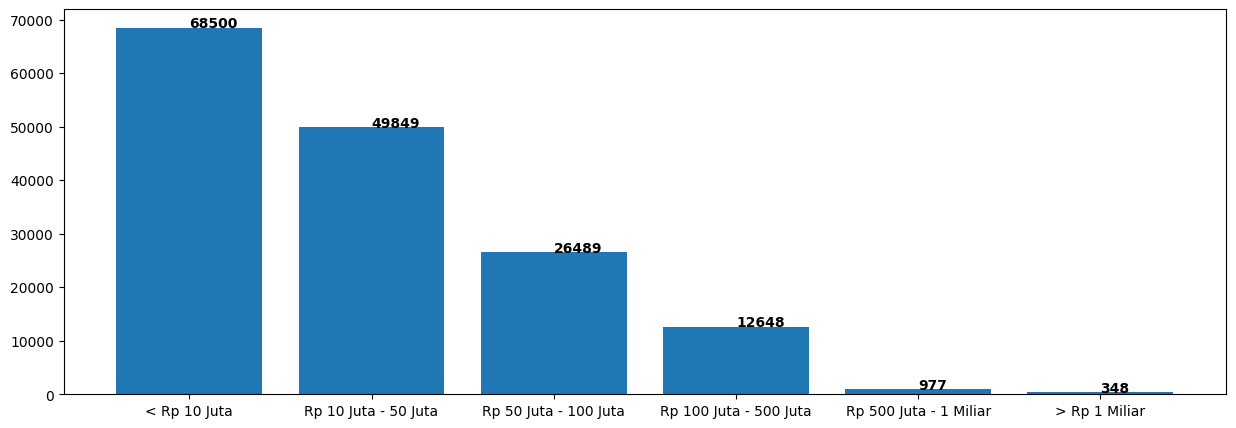

In [ ]:
fig = plt.figure(figsize =(15, 5))

K = user_income_range.copy()

K.sort_values('user_id', ascending=False, inplace=True)
x = K['user_income_range']
y = K['user_id']

#Add the data labels
for i, v in enumerate(y):
    vmil = round(v)
    plt.text(i, v, str(vmil), fontweight='bold')

plt.bar(x, y)   #Create the bar chart
plt.show()

Insight:based on range of income sources, users of this apps are dominated by users with income range of < Rp 10 juta

##Products

QUESTION 3
* How many users buy products in each mutual fund?

In [ ]:
num_users_by_saham = df_eda.groupby('buy_saham_transaction_amount')['user_id'].nunique()
print(num_users_by_saham)

buy_saham_transaction_amount
114.00         1
212.00         1
443.00         3
608.00         1
671.00         1
              ..
20000000.00    2
20910000.00    2
22130000.00    1
32800000.00    1
50000000.00    1
Name: user_id, Length: 421, dtype: int64


Insight:
From the data, we can see that the lowest purchase of this stock mutual funds is 114.00 and the maximum purchase is 50,000,000. With a total purchase of 421 times, we can consider the rest as users who have not made purchases at this stock mutual funds or users who are no longer activities (churn). 

In [ ]:
num_users_by_pasar_uang = df_eda.groupby('buy_pasar_uang_transaction_amount')['user_id'].nunique()
print(num_users_by_pasar_uang)

buy_pasar_uang_transaction_amount
928.00            1
5000.00           1
10000.00        663
10678.00          1
11000.00          3
               ... 
100000000.00      1
114000000.00      1
144600000.00      1
185075955.00      1
289200000.00      1
Name: user_id, Length: 407, dtype: int64


Insight:
From the data, we can see that the lowest purchase of this money market mutual funds is 928.00 and the maximum purchase is 289,200,000. With a total purchase of 407 times, we can consider the rest as users who have not made purchases at this money market mutual funds or users who are no longer activities (churn). Even though transactions in money market mutual funds are smaller than stock mutual funds, users are more willing to invest with a larger nominal value in money market mutual funds than stock mutual funds.

In [ ]:
num_users_by_pendapatan_tetap = df_eda.groupby('buy_pendapatan_tetap_transaction_amount')['user_id'].nunique()
print(num_users_by_pendapatan_tetap)

buy_pendapatan_tetap_transaction_amount
28.00             1
1139.00           1
1584.00           1
5000.00           2
10000.00        116
               ... 
250000000.00      1
300000000.00      1
350000000.00      1
398000000.00      1
400000000.00      1
Name: user_id, Length: 501, dtype: int64


Insight:
From the data, we can see that the lowest purchase of this fixed income mutual funds is 28.00 and the maximum purchase is 400,000,000. With a total purchase of 501 times, we can consider the rest as users who have not made purchases at this fixed income mutual funds or users who are no longer activities (churn). Fixed income mutual funds can be said to be the mutual funds that are most popular with users because it can be seen from the number of transactions that are more than stocks and money markets besides that the average nominal invested is also very large.

In [ ]:
num_users_by_campuran = df_eda.groupby('buy_campuran_transaction_amount')['user_id'].nunique()
print(num_users_by_campuran)

buy_campuran_transaction_amount
50000.00        2
100000.00       8
149000.00       1
150000.00       2
200000.00       2
300000.00       3
500000.00       3
901102.00       1
975000.00       1
1000000.00     25
1035000.00      1
1057000.00      1
1100000.00      1
1350000.00      1
1500000.00      6
2000000.00     17
2500000.00      5
3000000.00      1
3074900.00      1
5000000.00      4
5300000.00      1
6000000.00      2
7500000.00      1
8000000.00      1
9000000.00      2
10000000.00     9
13000000.00     1
13050000.00     1
15000000.00     2
20000000.00     3
24000000.00     1
50000000.00     2
Name: user_id, dtype: int64


Insight:
From the data, we can see that the lowest purchase of this mixed income mutual funds is 50,000 and the maximum purchase is 50,000,000. We can consider the rest as users who have not made purchases at this mixed mutual funds or users who are no longer activities (churn). We can see if the user has invested at most in 1 million and 2 million. This mixed mutual fund is the second prima donna after fixed income mutual fund where most people interested and the money invested is quite varied with the highest investment value of 50 million

##Finding Pattern:
Visualize the dataset, and find a pattern on time-series data in the dataset
* Is there any trend on the transaction?
* How about transaction trends for each product?

In [ ]:
# prepare dataset
df_trend = df.copy()
df_trend.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.00,100000.00,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
1,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.00,100000.00,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
2,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.00,100000.00,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
3,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.00,100000.00,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
4,3816789,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.00,100000.00,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00


In [ ]:
df_trend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  float64       
 9   total_buy_amoun

###Identify Trend

QUESTION 4
* Is there any trend on the transaction?


###Total Transaction

In [ ]:
transaction_trend = df_trend[['date','total_buy_transaction_amount']]    #Choose the variable wee need to make the chart
transaction_trend['year_month'] = transaction_trend['date'].dt.strftime('%Y-%m-%d')   #Change the issue month into year,month format to get monthly data

transaction_trend = transaction_trend.sort_values('date')  #Sort the values by the issue month, ascending
transaction_trend = transaction_trend.groupby('year_month').sum() #sum the data and group it by the year_month
transaction_trend = transaction_trend.reset_index()
transaction_trend.head()

<ipython-input-68-20f072d43eac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_trend['year_month'] = transaction_trend['date'].dt.strftime('%Y-%m-%d')   #Change the issue month into year,month format to get monthly data
<ipython-input-68-20f072d43eac>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  transaction_trend = transaction_trend.groupby('year_month').sum() #sum the data and group it by the year_month


,year_month,total_buy_transaction_amount
0,2021-08-04,0.00
1,2021-08-05,14570000.00
2,2021-08-06,20880000.00
3,2021-08-09,40975000.00
4,2021-08-10,24922709.00


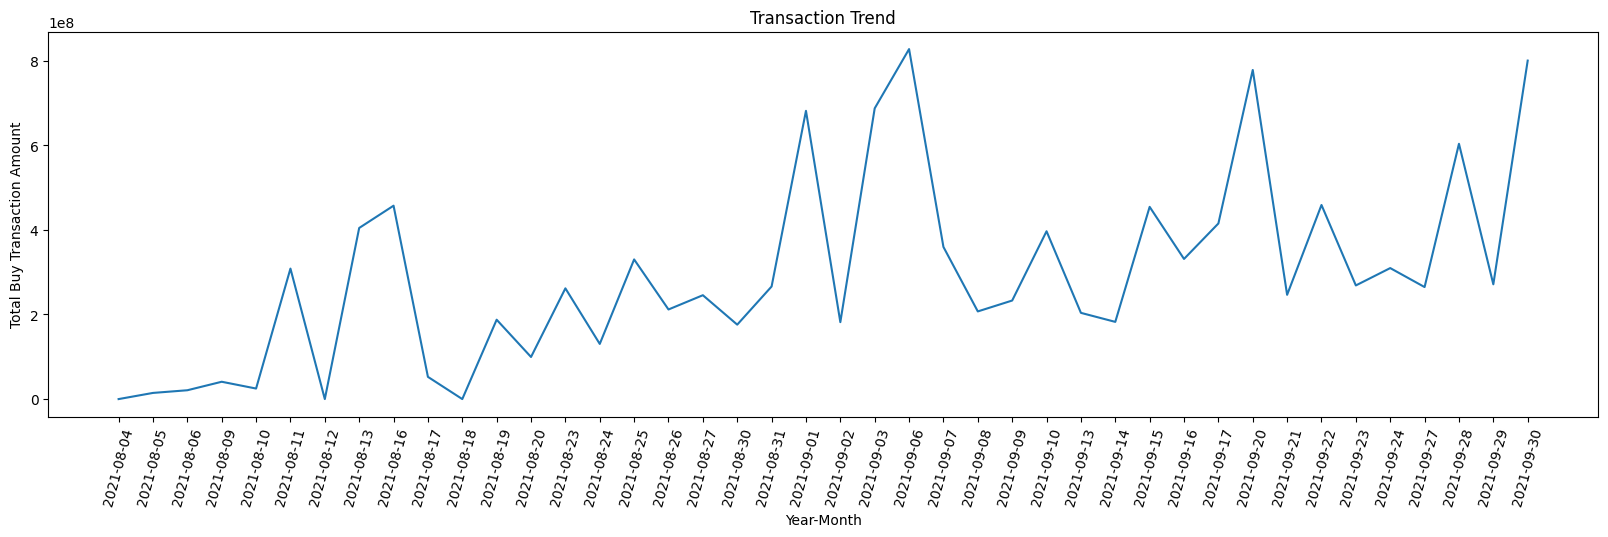

In [ ]:
plt.figure(figsize =(20, 5))
plt.plot(transaction_trend['year_month'], transaction_trend['total_buy_transaction_amount'])
plt.xlabel('Year-Month')
plt.xticks(rotation=75)
plt.ylabel('Total Buy Transaction Amount')
plt.title('Transaction Trend')
plt.show()

Insight:

Based on the line plots you provided, it appears that the total number of purchase transactions varies over time, with 
some months having a higher number of transactions than others. In addition, there is some seasonality in the data, with a higher number of transactions in the second half of each year. This suggests that there may be external factors influencing transaction trends.



###Total Transaction Each Product

In [ ]:
u_transaction_trend = df_trend[['date','user_id']]    #Choose the variable wee need to make the chart
u_transaction_trend['year_month'] = u_transaction_trend['date'].dt.strftime('%Y/%m/%d')   #Change the issue month into year,month format to get monthly data

u_transaction_trend = u_transaction_trend.sort_values('date')  #Sort the values by the issue month, ascending
u_transaction_trend = u_transaction_trend.groupby('year_month')['user_id'].count() #sum the data and group it by the year_month
u_transaction_trend = u_transaction_trend.reset_index()
u_transaction_trend.head()

<ipython-input-70-8cd1a190a2b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u_transaction_trend['year_month'] = u_transaction_trend['date'].dt.strftime('%Y/%m/%d')   #Change the issue month into year,month format to get monthly data


,year_month,user_id
0,2021/08/04,117
1,2021/08/05,204
2,2021/08/06,315
3,2021/08/09,426
4,2021/08/10,577


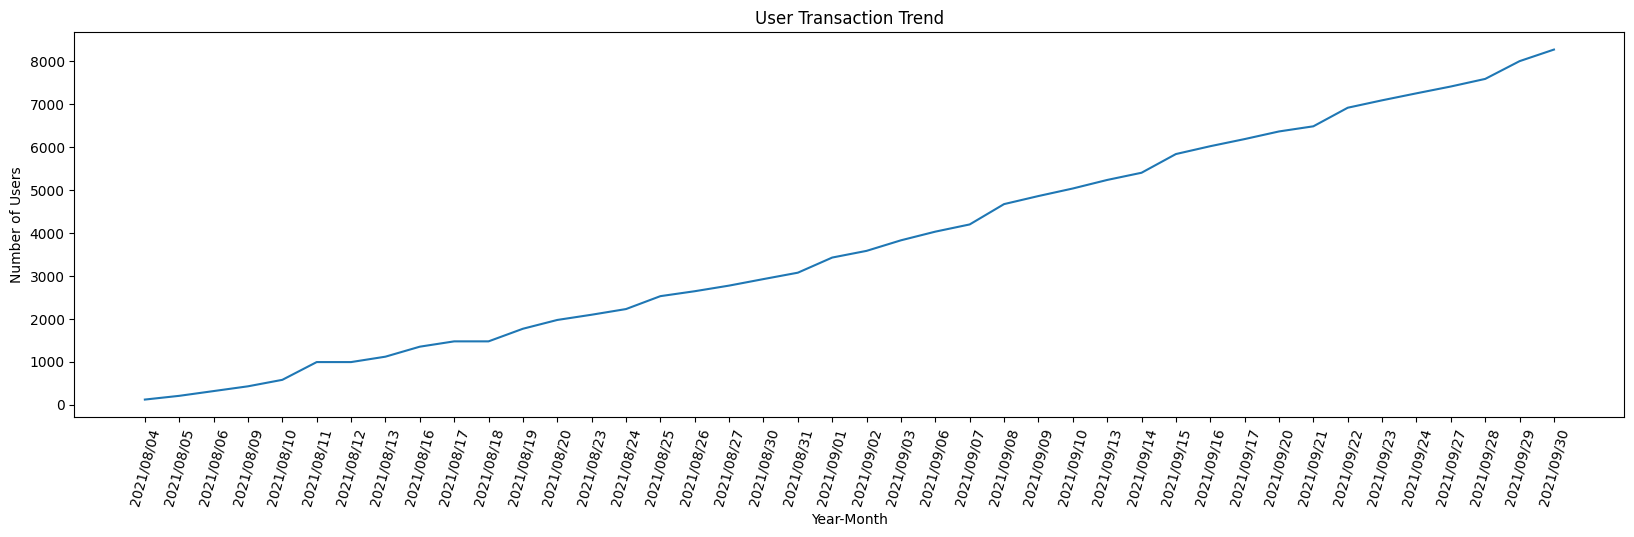

In [ ]:
plt.figure(figsize =(20, 5))
plt.plot(u_transaction_trend['year_month'], u_transaction_trend['user_id'])
plt.xlabel('Year-Month')
plt.xticks(rotation=75)
plt.ylabel('Number of Users')
plt.title('User Transaction Trend')
plt.show()

Insight:

From the plot it can be seen that the number of new users per month for the platform has experienced an increasing trend in the last 2 years (2021-2022), with quite significant fluctuations in certain months. There will be a significant peak in early 2022, indicating a drastic increase in the number of users during that period. The trend of increasing number of users may be related to several factors such as the increasing popularity of investment in the financial market and the improving economy in Indonesia.




###Identify Trend Each Product

QUESTION 5
* How about transaction trends for each product?


In [ ]:
df_sum = df_trend.groupby('date').agg(
    buy_saham_transaction_amount=('buy_saham_transaction_amount', 'sum'),
    buy_pasar_uang_transaction_amount=('buy_pasar_uang_transaction_amount', 'sum'),
    buy_pendapatan_tetap_transaction_amount=('buy_pendapatan_tetap_transaction_amount', 'sum'),
    buy_campuran_transaction_amount=('buy_campuran_transaction_amount', 'sum')
)

df_sum = df_sum.reset_index()
df_sum

,date,buy_saham_transaction_amount,buy_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount
0,2021-08-04,0.00,0.00,0.00,0.00
1,2021-08-05,1430000.00,2730000.00,10410000.00,0.00
2,2021-08-06,4010000.00,1555000.00,6315000.00,9000000.00
3,2021-08-09,4130000.00,6030000.00,5315000.00,25500000.00
4,2021-08-10,5779994.00,14022715.00,5020000.00,100000.00
5,2021-08-11,21455000.00,261691127.00,12890030.00,12500000.00
6,2021-08-12,0.00,0.00,0.00,0.00
7,2021-08-13,26175000.00,96238000.00,262155000.00,20000000.00
8,2021-08-16,18005920.00,16512791.00,414635000.00,8100000.00
9,2021-08-17,12060000.00,17534588.00,12940158.00,10000000.00


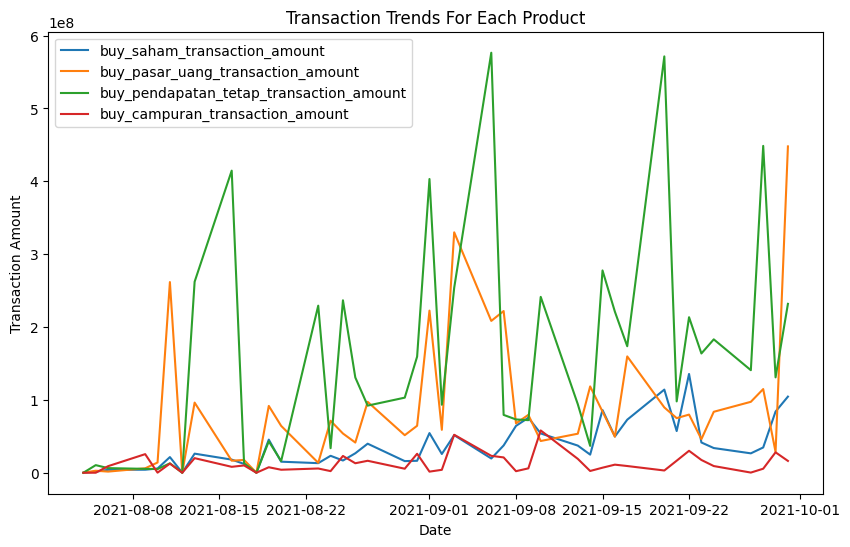

In [ ]:
# set figure size
plt.figure(figsize=(10, 6))

# plot line for each column
for col in df_sum.columns[1:]:
    plt.plot(df_sum['date'], df_sum[col], label=col)

# set plot title, xlabel, ylabel and legend
plt.title('Transaction Trends For Each Product')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.legend()

# show plot
plt.show()


Insight:

From the plot, we can see that investment product transactions tend to increase during the observed period (July 2021 - January 2022).

The investment product with the highest number of transactions is buy_saham_transaction_amount, followed by buy_pasar_uang_transaction_amount, and buy_pendapatan_tetap_transaction_amount. Meanwhile, buy_campuran_transaction_amount has the fewest number of transactions compared to the other three investment products.

The increase in transaction volume is more significant in the investment products buy_saham_transaction_amount and buy_pasar_uang_transaction_amount during late 2021 and early 2022. Meanwhile, buy_pendapatan_tetap_transaction_amount shows a stable upward trend throughout the observed period.

From this plot, it can be concluded that there is a tendency for people to invest in the stock market and money market.

# E) SEGMENTATION

#### Data Preparation

In [ ]:
#Make a copy of the clean data for segmentation
df_segmentation = df.copy()
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  float64       
 9   total_buy_amoun

Here we want to create our cluster using these feature :
* user_age
* total_invested_amount

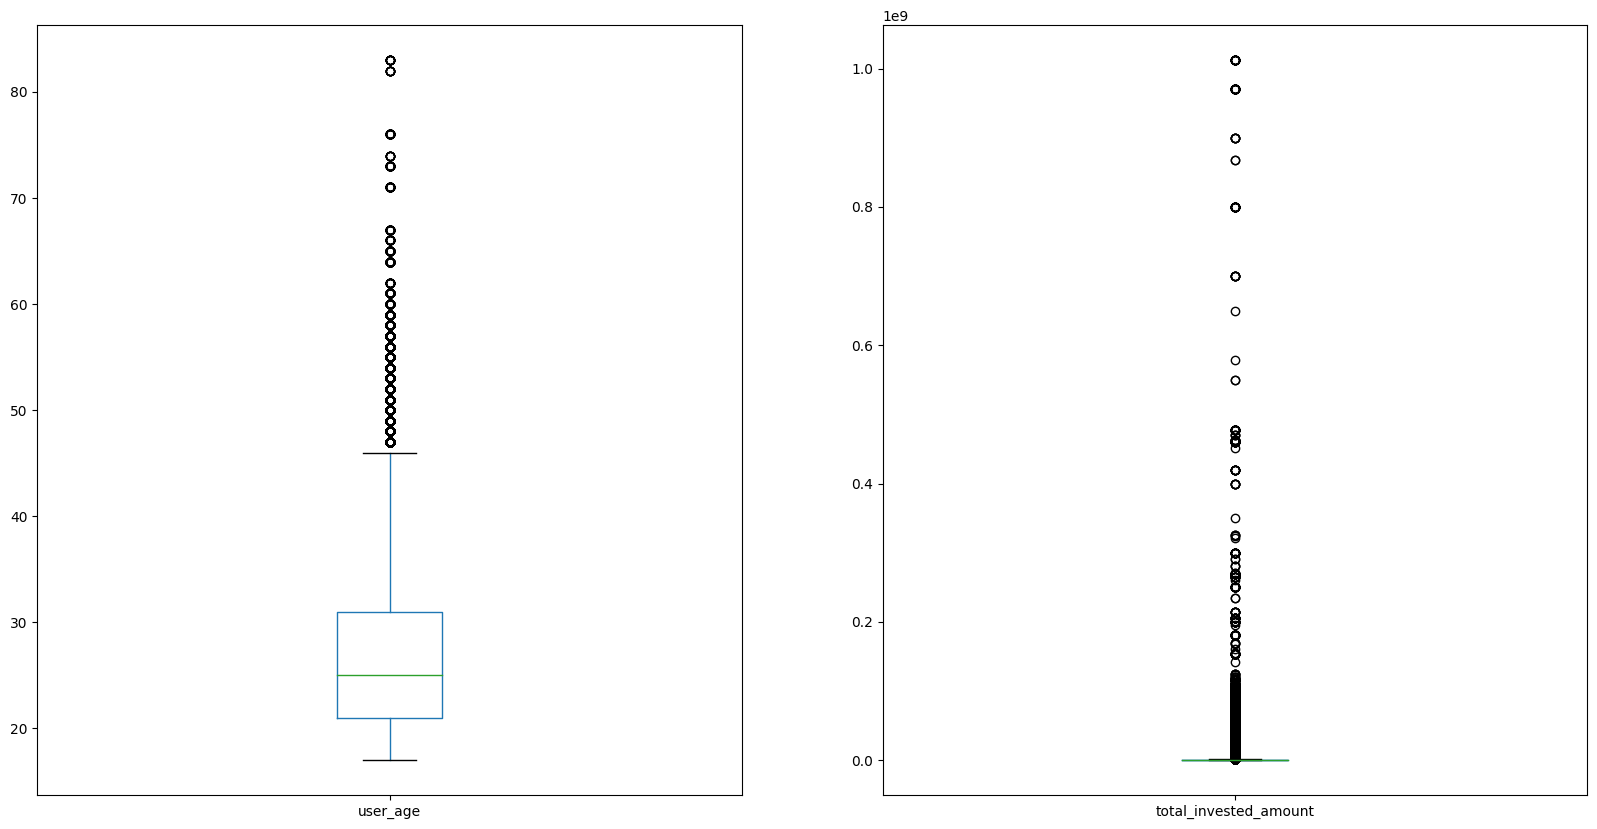

In [ ]:
# filter numeric column
feature = ['user_age', 'total_invested_amount']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = df_segmentation.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

In [ ]:
df['total_invested_amount']

0          500000.00
1          500000.00
2          500000.00
3          500000.00
4          500000.00
             ...    
158806   61100000.00
158807   61100000.00
158808   61100000.00
158809   71100000.00
158810   71100000.00
Name: total_invested_amount, Length: 158811, dtype: float64

In [ ]:
df['user_age']

0         53
1         53
2         53
3         53
4         53
          ..
158806    49
158807    49
158808    49
158809    49
158810    49
Name: user_age, Length: 158811, dtype: int64

####Libraries

In [ ]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering

####Preparing user age and total invested amount

In [ ]:
df_segmentation_feature = df_segmentation[['user_id','user_age', 'total_invested_amount']]
df_segmentation_feature

,user_id,user_age,total_invested_amount
0,3816789,53,500000.00
1,3816789,53,500000.00
2,3816789,53,500000.00
3,3816789,53,500000.00
4,3816789,53,500000.00
...,...,...,...
158806,3881981,49,61100000.00
158807,3881981,49,61100000.00
158808,3881981,49,61100000.00
158809,3881981,49,71100000.00


##Check Data Distribution

###No Scale

<Axes: xlabel='user_age', ylabel='total_invested_amount'>

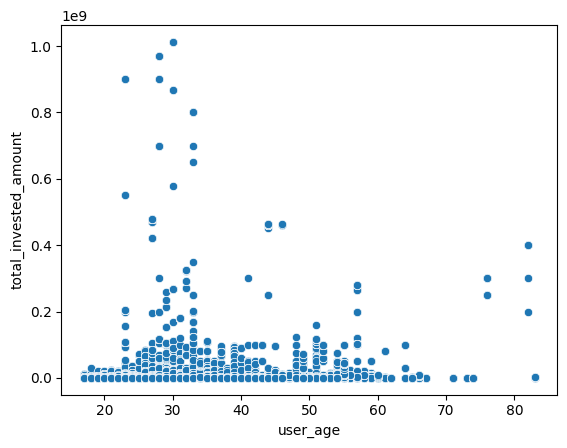

In [ ]:
sns.scatterplot(data = df_segmentation_feature, x='user_age', y='total_invested_amount')

###Standard Scaler

In [ ]:
# Define Standard Scale dataset
ss_scale_df = df_segmentation_feature.copy()
column = ['user_age','total_invested_amount']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

<Axes: xlabel='user_age', ylabel='total_invested_amount'>

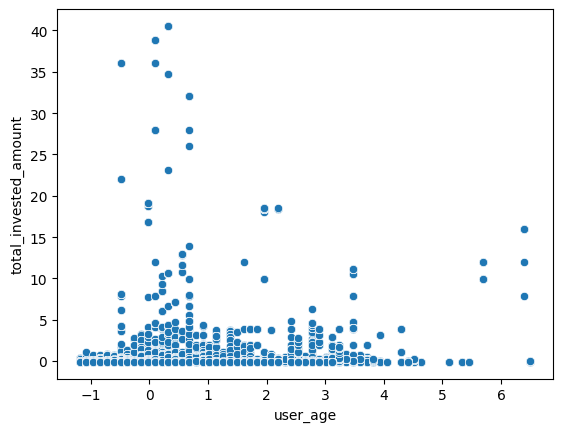

In [ ]:
sns.scatterplot (data = ss_scale_df, x='user_age', y='total_invested_amount')

In [ ]:
ss_scale_df[['user_age', 'total_invested_amount']].head()

,user_age,total_invested_amount
0,3.01,-0.08
1,3.01,-0.08
2,3.01,-0.08
3,3.01,-0.08
4,3.01,-0.08


###Robust Scaler

In [ ]:
# Define Robust Scale dataset
rs_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['user_age', 'total_invested_amount']] = rs_scaler.fit_transform(rs_scale_df[['user_age', 'total_invested_amount']])

<Axes: xlabel='user_age', ylabel='total_invested_amount'>

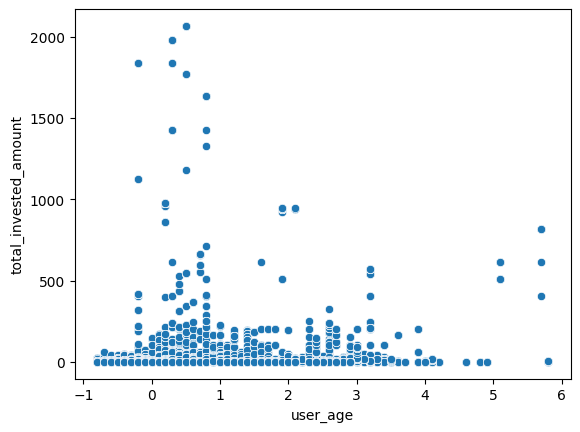

In [ ]:
sns.scatterplot (data = rs_scale_df, x='user_age', y='total_invested_amount')

###MinMax Scaler

In [ ]:
# Define Minmax Scale dataset
mm_scale_df = df_segmentation_feature.copy()
column = df_segmentation_feature.columns.to_list()
# using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df[['user_age', 'total_invested_amount']] = mm_scaler.fit_transform(mm_scale_df[['user_age', 'total_invested_amount']])

<Axes: xlabel='user_age', ylabel='total_invested_amount'>

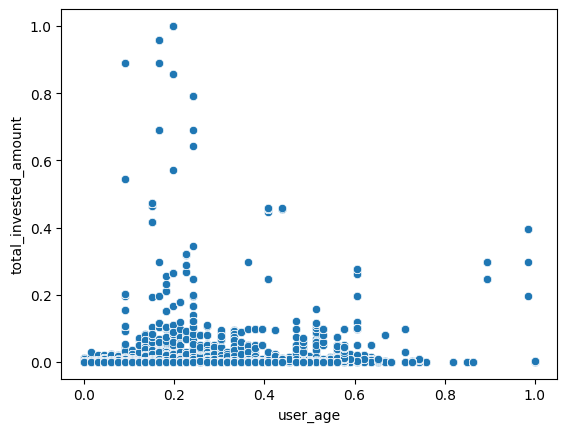

In [ ]:
sns.scatterplot (data = mm_scale_df, x='user_age', y='total_invested_amount')

##Cluster

###Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

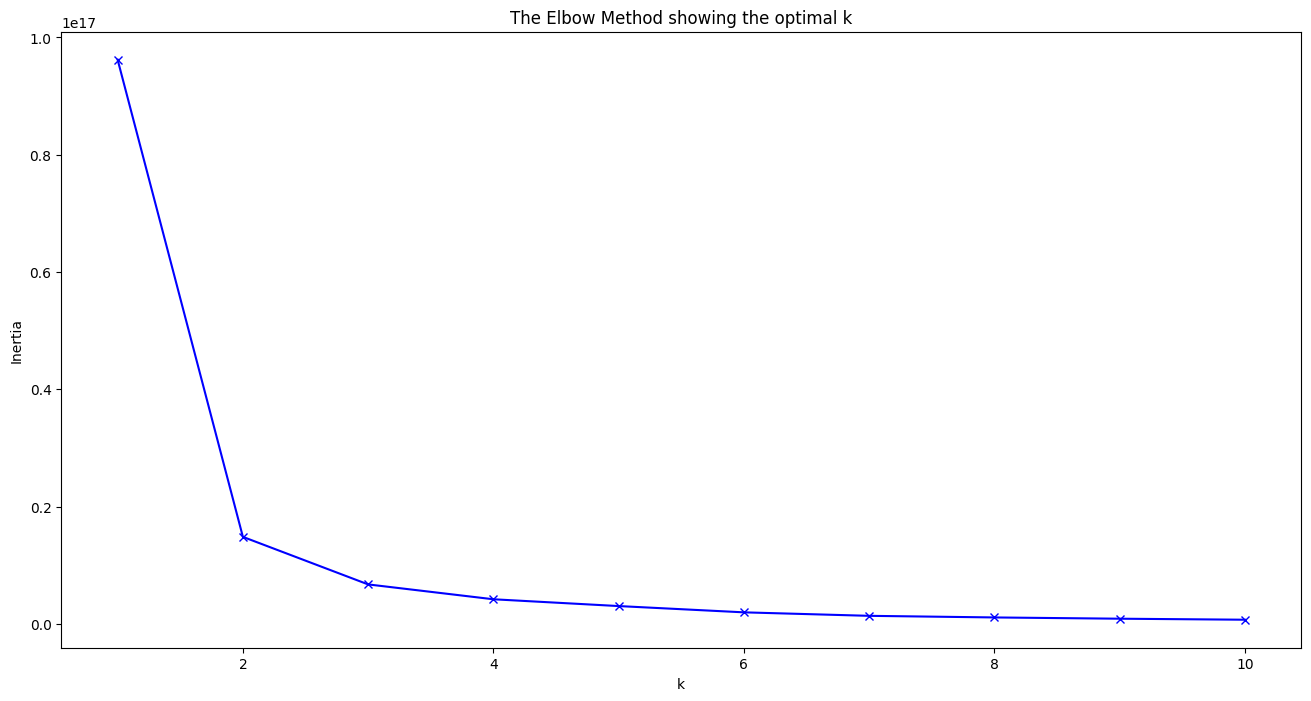

[9.619893368532582e+16, 1.4853706516462532e+16, 6749885411654596.0, 4218036227156944.0, 3059671740889131.0, 1989428954211757.0, 1394524105235317.5, 1119990372549936.2, 904767657450545.8, 731353204128152.4]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df)  
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

Insight:
As can be seen the elbow is at the index 3, so we can estimate the number of clusters to be 3.

### Silhouette Analysis

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.9597022033720715


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.6581341793872975


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5762527846723655


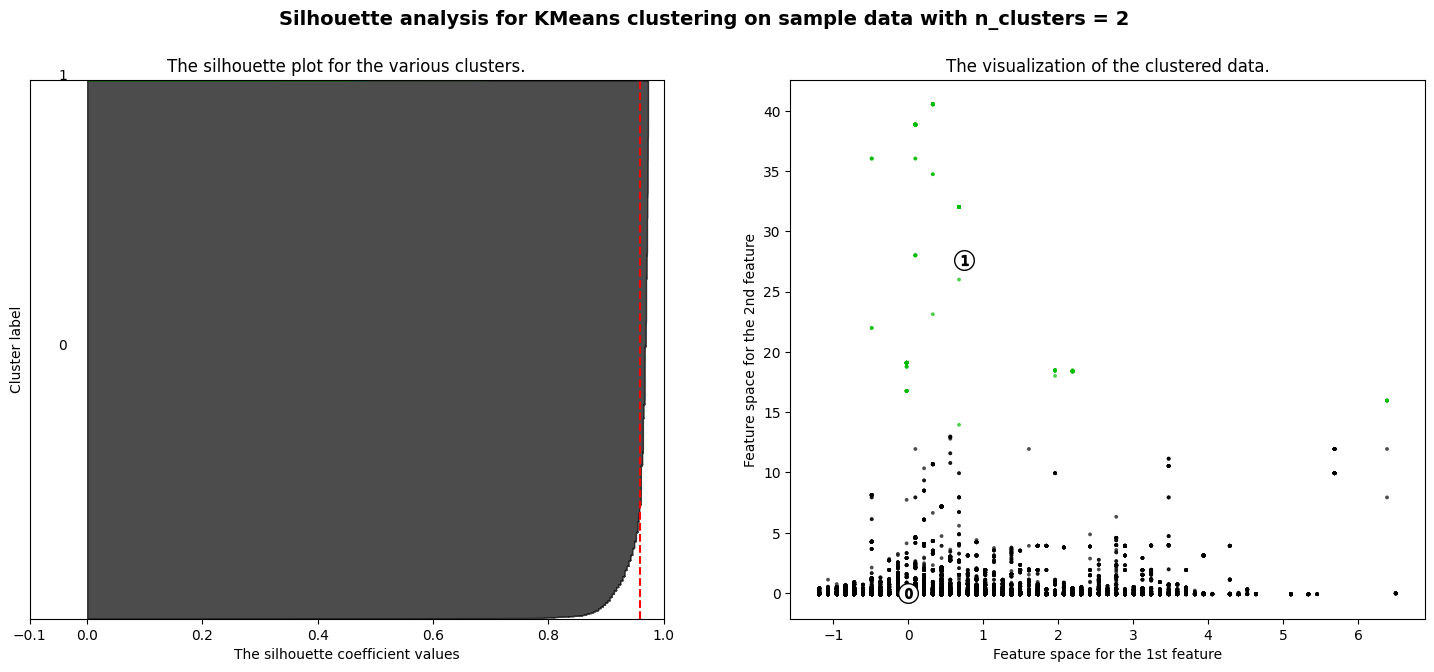

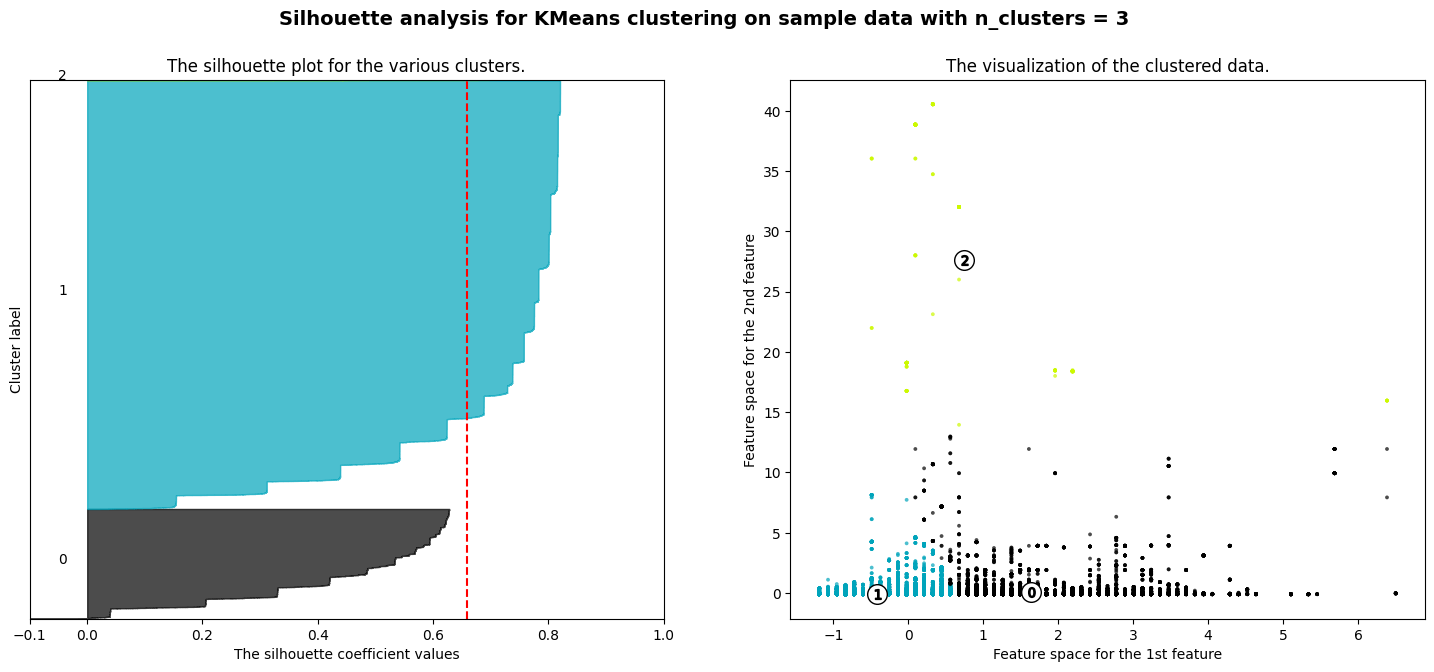

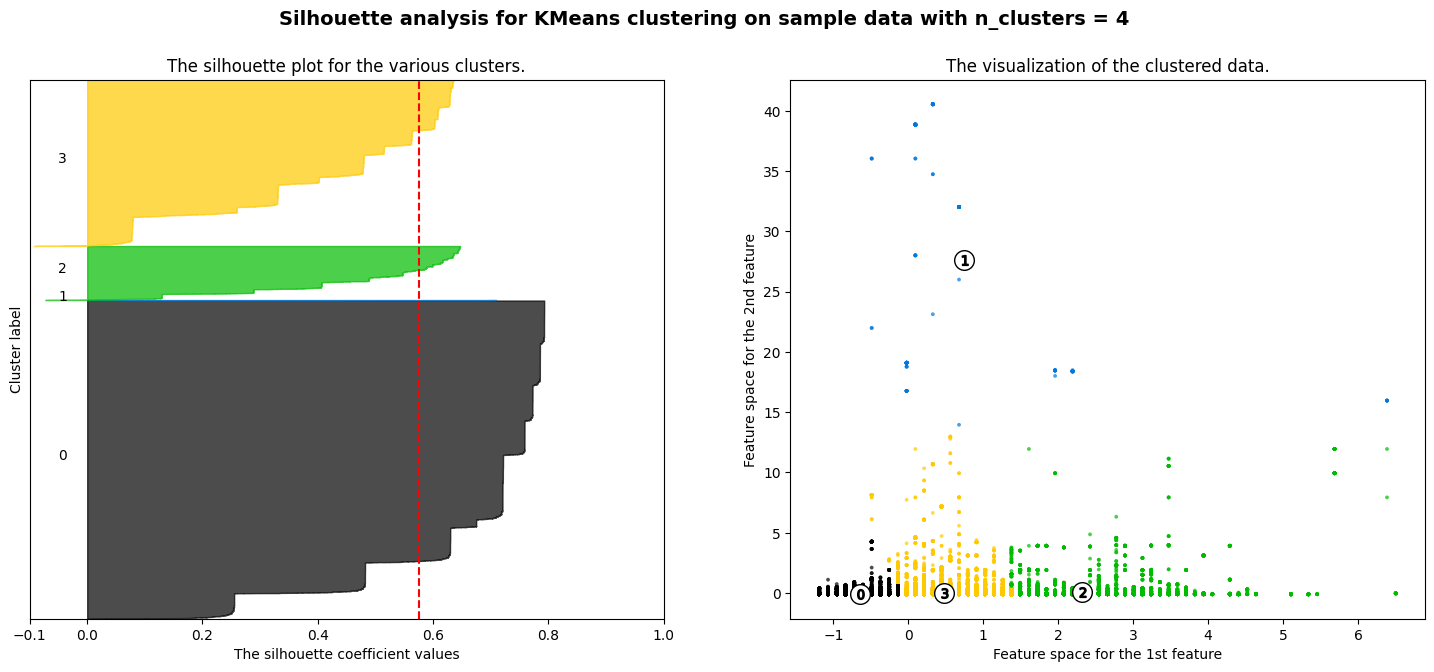

In [ ]:
silhoutte_analysis(ss_scale_df[['user_age','total_invested_amount']],list(range(2,5)))

Insight:
The best score silhouette is for n_clusters = 2 with a score of 0.9597022033720715. But using n_clusters=4 also provide more meaningful insights and easier interpretation of the resulting clusters compared to having too few or too many clusters.

##Segmentation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 27 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  float64       
 9   total_buy_amoun

With ss_scaler

Cluster 4

In [ ]:
# make cluster
Cluster_4 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=4) 
cluster_model.fit_predict(Cluster_4[['user_age','total_invested_amount']])
Cluster_4['cluster'] = cluster_model.labels_
Cluster_4.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,user_age,total_invested_amount,cluster
0,3816789,3.01,-0.08,3
1,3816789,3.01,-0.08,3
2,3816789,3.01,-0.08,3
3,3816789,3.01,-0.08,3
4,3816789,3.01,-0.08,3


<Axes: xlabel='cluster', ylabel='total_invested_amount'>

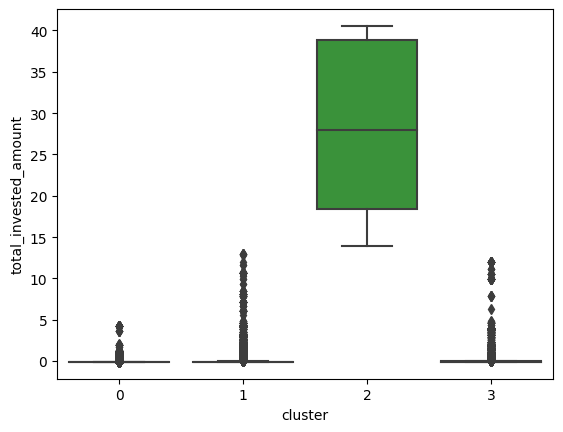

In [ ]:
# Total invested amount
sns.boxplot (data =Cluster_4 , x ='cluster', y ='total_invested_amount')

<Axes: xlabel='cluster', ylabel='user_age'>

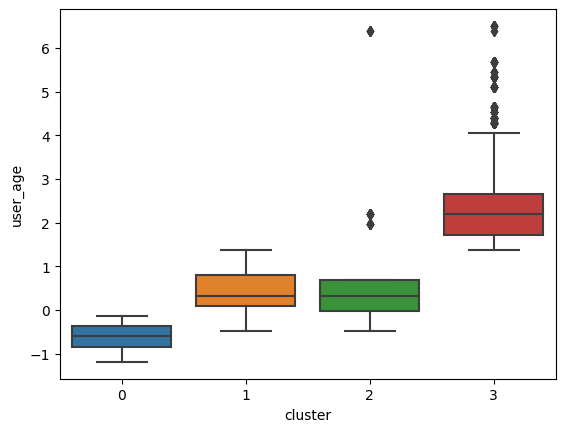

In [ ]:
# User age
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='user_age')

In [ ]:
# make cluster
Cluster_3 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=3)
cluster_model.fit_predict(Cluster_3[['user_age', 'total_invested_amount']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,user_age,total_invested_amount,cluster
0,3816789,3.01,-0.08,2
1,3816789,3.01,-0.08,2
2,3816789,3.01,-0.08,2
3,3816789,3.01,-0.08,2
4,3816789,3.01,-0.08,2


<Axes: xlabel='cluster', ylabel='total_invested_amount'>

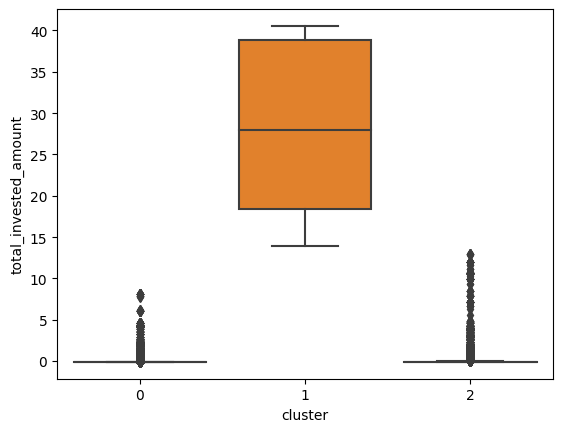

In [ ]:
# Total invested amount
sns.boxplot (data = Cluster_3 , x ='cluster' , y ='total_invested_amount')

<Axes: xlabel='cluster', ylabel='user_age'>

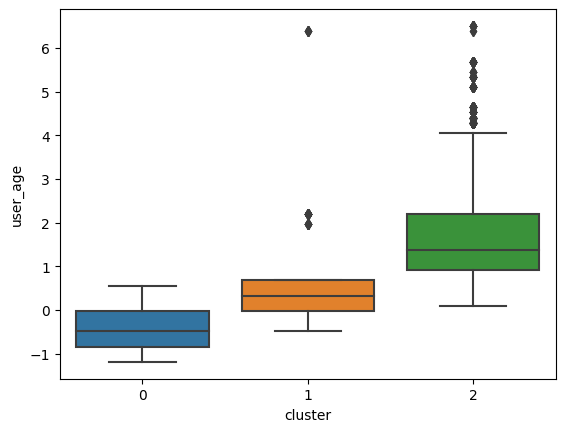

In [ ]:
# User age
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='user_age')

##Merge Hasil Cluster Dengan Dataset

In [ ]:
df_segmented = Cluster_4.merge(df_segmentation,how= 'inner', on = 'user_id')
df_segmented

,user_id,user_age_x,total_invested_amount_x,cluster,registration_import_datetime,user_gender,user_age_y,user_occupation,user_income_range,referral_code_used,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount_y
0,3816789,3.01,-0.08,3,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
1,3816789,3.01,-0.08,3,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
2,3816789,3.01,-0.08,3,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
3,3816789,3.01,-0.08,3,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
4,3816789,3.01,-0.08,3,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,...,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179866,3881981,2.54,2.76,3,2021-08-22 19:27:20,Female,49,Pengusaha,Rp 100 Juta - 500 Juta,not using refferal,...,NaN,NaN,NaN,NaN,NaN,10000000.00,10100000.00,41000000.00,NaN,61100000.00
4179867,3881981,2.54,2.76,3,2021-08-22 19:27:20,Female,49,Pengusaha,Rp 100 Juta - 500 Juta,not using refferal,...,NaN,NaN,NaN,NaN,NaN,10000000.00,10100000.00,41000000.00,NaN,61100000.00
4179868,3881981,2.54,2.76,3,2021-08-22 19:27:20,Female,49,Pengusaha,Rp 100 Juta - 500 Juta,not using refferal,...,NaN,NaN,NaN,NaN,NaN,10000000.00,10100000.00,41000000.00,NaN,61100000.00
4179869,3881981,2.54,2.76,3,2021-08-22 19:27:20,Female,49,Pengusaha,Rp 100 Juta - 500 Juta,not using refferal,...,NaN,NaN,NaN,10000000.00,NaN,20000000.00,10100000.00,41000000.00,NaN,71100000.00


##Visualize Cluster

For now we call our clusters as is, then we will create an interesting name for naming the cluster

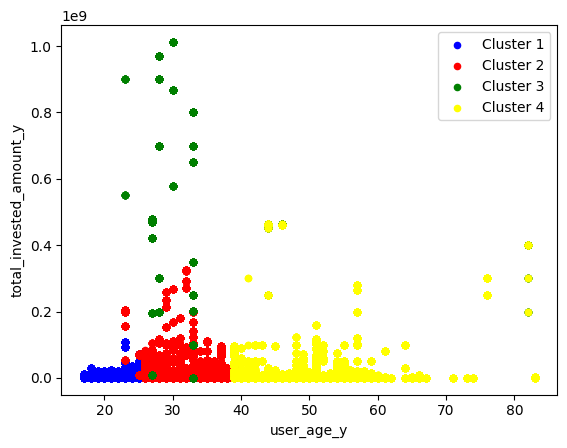

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='user_age_y', y='total_invested_amount_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='user_age_y', y='total_invested_amount_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='user_age_y', y='total_invested_amount_y', c='green', label='Cluster 3', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 3].plot.scatter(x='user_age_y', y='total_invested_amount_y', c='yellow', label='Cluster 4', ax = cluster_scatter)

Insight:
It can be seen that because the dataframe has too many values of 0, the scatter plots are clustered at a value of 0, but we can see that there are also scatter plots that are not at a value of 0, that is the total money that has been spent on mutual funds.

###Descriptive Statistic

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['user_age_y','total_invested_amount_y']].agg(['count','mean','min','max','median']).T


cluster                                   0            1             2  \
user_age_y              count    2475911.00   1276177.00       4620.00   
                        mean          21.70        31.24         31.27   
                        min           17.00        23.00         23.00   
                        max           26.00        39.00         82.00   
                        median        22.00        30.00         28.00   
total_invested_amount_y count    2475911.00   1276177.00       4620.00   
                        mean      684639.75   3395875.58  614766082.77   
                        min            0.00         0.00     500751.00   
                        max    205026535.00 970000000.00 1012200000.00   
                        median    100000.00    200000.00  478075955.00   

cluster                                   3  
user_age_y              count     423163.00  
                        mean          47.03  
                        min           39.00  
                        max           83.00  
                        median        46.00  
total_invested_amount_y count     423163.00  
                        mean     5051669.90  
                        min            0.00  
                        max    463000000.00  
                        median    250000.00

###Cluster Interpretation

To check what can be analyzed

In [ ]:
pd.set_option('display.max_columns',None)
df_segmented.head(5)

,user_id,user_age_x,total_invested_amount_x,cluster,registration_import_datetime,user_gender,user_age_y,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount_y
0,3816789,3.01,-0.08,3,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.00,100000.00,NaN,2021-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
1,3816789,3.01,-0.08,3,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.00,100000.00,NaN,2021-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
2,3816789,3.01,-0.08,3,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.00,100000.00,NaN,2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
3,3816789,3.01,-0.08,3,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.00,100000.00,NaN,2021-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00
4,3816789,3.01,-0.08,3,2021-08-12 07:19:32,Female,53,IRT,Rp 50 Juta - 100 Juta,not using refferal,Gaji,600000.00,100000.00,NaN,2021-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190000.00,40000.00,270000.00,NaN,500000.00


####User Age

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['user_age_y'].mean()

,cluster,user_age_y
0,0,21.70
1,1,31.24
2,2,31.27
3,3,47.03


Insight :
* 0 = Average age = 47.03 (Highest)
* 1 = Average age = 21.70 (Lowest)
* 2 = Average age = 31.27
* 3 = Average age = 31.24

####Total Invested Amount

In [ ]:
df_segmented.groupby(['cluster'], as_index = False)['total_invested_amount_y'].mean()

,cluster,total_invested_amount_y
0,0,684639.75
1,1,3395875.58
2,2,614766082.77
3,3,5051669.90


Insight :
* 0 = average total invested amount = 5051669.90 
* 1 = average total invested amount = 684639.75 (The lowest)
* 2 = average total invested amount = 614766082.77 (The highest)
* 3 = average total invested amount = 3395875.58

#### User Gender

In [ ]:
df_segmented.groupby(['cluster','user_gender'], as_index = False)['user_id'].count()

,cluster,user_gender,user_id
0,0,Female,968561
1,0,Male,1507350
2,1,Female,495406
3,1,Male,780771
4,2,Female,3303
5,2,Male,1317
6,3,Female,178186
7,3,Male,244977


Insight:
In this cluster 0,1, and 3 male gender is dominant than female but in cluster 2 vise versa

####User Occupation  

In [ ]:
df_segmented.groupby(['cluster','user_occupation'], as_index = False)['user_id'].count()

,cluster,user_occupation,user_id
0,0,Guru,4691
1,0,IRT,40655
2,0,Others,193473
3,0,PNS,5314
4,0,Pelajar,2070437
5,0,Pengusaha,22537
6,0,Swasta,134621
7,0,TNI/Polisi,4183
8,1,Guru,16353
9,1,IRT,81085


Insight:
* 0 = Most user occupation are dominated by swasta and student
* 1 = Most user occupation are dominated by student and others
* 2 = Most user occupation is dominated by swasta 
* 3 = Most user occupation are dominated by swasta and house wife

####User Income Range

In [ ]:
df_segmented.groupby(['cluster','user_income_range'], as_index = False)['user_id'].count()

,cluster,user_income_range,user_id
0,0,< Rp 10 Juta,1471437
1,0,> Rp 1 Miliar,3498
2,0,Rp 10 Juta - 50 Juta,728218
3,0,Rp 100 Juta - 500 Juta,34201
4,0,Rp 50 Juta - 100 Juta,238233
5,0,Rp 500 Juta - 1 Miliar,324
6,1,< Rp 10 Juta,252939
7,1,> Rp 1 Miliar,4645
8,1,Rp 10 Juta - 50 Juta,450276
9,1,Rp 100 Juta - 500 Juta,194060


Insight:
* 0 = The income range of users are dominated by 10jt-50jt and 50jt-100jt
* 1 = The income range of users are dominated by >10jt and 50jt-100jt
* 2 = The income range of users are dominated by 50jt-100jt
* 3 = The income range of users are dominated by 10jt-50jt and 50jt-100jt

####Referral Code Used

In [ ]:
df_segmented.groupby(['cluster','referral_code_used'], as_index = False)['user_id'].count()

,cluster,referral_code_used,user_id
0,0,not using refferal,1698986
1,0,used referral,776925
2,1,not using refferal,905218
3,1,used referral,370959
4,2,not using refferal,3201
5,2,used referral,1419
6,3,not using refferal,301175
7,3,used referral,121988


Insight:
All clusters show that users are not using refferal is dominan than used refferal

####User Income Source

In [ ]:
df_segmented.groupby(['cluster','user_income_source'], as_index = False)['user_id'].count()

,cluster,user_income_source,user_id
0,0,Bunga Simpanan,3944
1,0,Dari Orang Tua / Anak,111088
2,0,Dari Suami / istri,7435
3,0,Gaji,1378671
4,0,Hasil Investasi,18347
5,0,Keuntungan Bisnis,223319
6,0,Lainnya,70610
7,0,Tabungan,110731
8,0,Undian,546559
9,0,Warisan,5207


Insight:
User income users in all clusters are showing that salary (gaji) dominant than the others

##Churn

###Data Preparation

In [ ]:
churn_url = 'https://docs.google.com/spreadsheets/d/1WxGrECbxJzD3cJmkuZ7sorxGQJwWCTIP1N04_Z7UaCw/edit#gid=0'
churn_url_trf = churn_url.replace('/edit#gid=', '/export?format=csv&gid=')
churn = pd.read_csv(churn_url_trf)
churn.head()

,user_id,churn
0,50701,1
1,50961,1
2,51883,0
3,53759,0
4,54759,1


###Feature Engineering

In [ ]:
# merge user with churn data (getting only user with churn data)
users_with_churn = users.merge(churn, on='user_id', how='inner')
users_with_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8484 entries, 0 to 8483
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       8484 non-null   int64 
 1   registration_import_datetime  8484 non-null   object
 2   user_gender                   8484 non-null   object
 3   user_age                      8484 non-null   int64 
 4   user_occupation               8484 non-null   object
 5   user_income_range             8484 non-null   object
 6   referral_code_used            3029 non-null   object
 7   user_income_source            8484 non-null   object
 8   end_of_month_invested_amount  8484 non-null   int64 
 9   total_buy_amount              8484 non-null   int64 
 10  total_sell_amount             8484 non-null   int64 
 11  churn                         8484 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 861.7+ KB


For feature engineering, there are some that we can do:
1. breakdown invested amount into each product
2. breakdown total buy / sell amount into each product
3. get average daily buy / sell amount (also can split into each product)
4. get days from registration to first trx date / last trx date
5. get difference invested amount from first trx date to last trx date
6. add categorical column in clustering

In [ ]:
# 1. invested amount per product
invested_amount = daily_user_transaction.groupby(['user_id'])[['saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount']].sum().reset_index()
invested_amount.head()

NameError: ignored

In [ ]:
# 2.1. buy amount per product
buy_amount = daily_user_transaction.groupby(['user_id'])[['buy_saham_transaction_amount','buy_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount']].sum().reset_index()
buy_amount.head()

In [ ]:
# 2.2. sell amount per product
sell_amount = daily_user_transaction.groupby(['user_id'])[['sell_saham_transaction_amount','sell_pasar_uang_transaction_amount','sell_pendapatan_tetap_transaction_amount','sell_campuran_transaction_amount']].sum().reset_index()
sell_amount.head()

In [ ]:
# 3.1. avg buy amount per product
column_rename = {'buy_saham_transaction_amount':'avg_buy_saham_transaction_amount',
                 'buy_pasar_uang_transaction_amount':'avg_buy_pasar_uang_transaction_amount',
                 'buy_pendapatan_tetap_transaction_amount':'avg_buy_pendapatan_tetap_transaction_amount',
                 'buy_campuran_transaction_amount':'avg_buy_campuran_transaction_amount'}
avg_buy_amount = daily_user_transaction.groupby(['user_id'])[['buy_saham_transaction_amount','buy_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount']].mean().reset_index().rename(columns=column_rename)
avg_buy_amount.head()

In [ ]:
# 3.2. avg sell amount per product
column_rename = {'sell_saham_transaction_amount':'avg_sell_saham_transaction_amount',
                 'sell_pasar_uang_transaction_amount':'avg_sell_pasar_uang_transaction_amount',
                 'sell_pendapatan_tetap_transaction_amount':'avg_sell_pendapatan_tetap_transaction_amount',
                 'sell_campuran_transaction_amount':'avg_sell_campuran_transaction_amount'}
avg_sell_amount = daily_user_transaction.groupby(['user_id'])[['sell_saham_transaction_amount','sell_pasar_uang_transaction_amount','sell_pendapatan_tetap_transaction_amount','sell_campuran_transaction_amount']].mean().reset_index().rename(columns=column_rename)
avg_sell_amount.head()

In [ ]:
# 4.days from registration to first trx date / last trx date
user_first_trx = daily_user_transaction.groupby(['user_id'])['date'].min().rename('first_trx_date')
user_last_trx = daily_user_transaction.groupby(['user_id'])['date'].max().rename('last_trx_date')

users_with_churn = users_with_churn.merge(user_first_trx, on='user_id', how='left')
users_with_churn = users_with_churn.merge(user_last_trx, on='user_id', how='left')

users_with_churn['days_regist_date_to_first_trx'] = (users_with_churn['first_trx_date'] - users_with_churn['registration_import_datetime']).dt.days
users_with_churn['days_regist_date_to_last_trx'] = (users_with_churn['last_trx_date'] - users_with_churn['registration_import_datetime']).dt.days
users_with_churn.head()

In [ ]:
# 5. diff invested amount from first to last
daily_user_transaction_with_trx_date = daily_user_transaction.merge(user_first_trx, on='user_id', how='left').merge(user_last_trx, on='user_id', how='left')
first_invested_amount = daily_user_transaction_with_trx_date[daily_user_transaction_with_trx_date['date']==daily_user_transaction_with_trx_date['first_trx_date']][['user_id','total_invested_amount']].rename(columns={'total_invested_amount':'first_invested_amount'})
last_invested_amount = daily_user_transaction_with_trx_date[daily_user_transaction_with_trx_date['date']==daily_user_transaction_with_trx_date['last_trx_date']][['user_id','total_invested_amount']].rename(columns={'total_invested_amount':'last_invested_amount'})

users_with_churn = users_with_churn.merge(first_invested_amount, on='user_id', how='left')
users_with_churn = users_with_churn.merge(last_invested_amount, on='user_id', how='left')

users_with_churn['diff_invested_amount'] = (users_with_churn['last_invested_amount'] - users_with_churn['first_invested_amount'])
users_with_churn.head()

In [ ]:
# 6. categorical column in cluster
users_categorical_column = ['user_gender','referral_code_used']
users_ordinal_column = ['user_income_range']
users_many_category_column = ['user_occupation','user_income_source']

users_with_churn[users_categorical_column] = pd.get_dummies(users_with_churn[users_categorical_column], drop_first=True)
ordinal_map = {'< 10 Juta': 1,'Rp 10 Juta - 50 Juta': 2, '> Rp 50 Juta - 100 Juta': 3, '> Rp 100 Juta - 500 Juta': 4, '> Rp 500 Juta - 1 Miliar': 5, '> Rp 1 Miliar': 6}
users_with_churn[users_ordinal_column] = users_with_churn[users_ordinal_column].replace(ordinal_map)
dum_df = pd.get_dummies(users_with_churn, columns=users_many_category_column, prefix=users_many_category_column)
users_with_churn = users_with_churn.merge(dum_df)
users_with_churn = users_with_churn.drop(users_many_category_column,axis=1)

with pd.option_context('display.max_columns', None,):
  print(users_with_churn.head())

In [ ]:
# merge all to 1 dataframe user
users_with_churn = users_with_churn.merge(invested_amount, on='user_id', how='left').merge(buy_amount, on='user_id', how='left').merge(avg_buy_amount, on='user_id', how='left').merge(avg_sell_amount, on='user_id', how='left')
with pd.option_context('display.max_columns', None,):
  print(users_with_churn.head())

In [ ]:
users_with_churn.info()

In [ ]:
# take out user with no transaction
users_with_churn.dropna(axis=0,inplace=True)
users_with_churn.info()

In [ ]:
# split the data into each cluster (need to repeat this for every cluster)
users_with_churn_regression = users_with_churn[users_with_churn['cluster']==0]

In [ ]:
# remove unused column
users_with_churn_regression = users_with_churn_regression.set_index('user_id')
users_with_churn_regression = users_with_churn_regression.drop(['registration_import_datetime','first_trx_date','last_trx_date','churn','cluster'],axis=1)
users_with_churn_regression.info()

## Correlation Analysis

Draw correlation using heatmap

In [ ]:
corr_column = users_with_churn.select_dtypes(include=[np.number]).columns.to_list()

In [ ]:
fig = plt.figure(figsize=(50,50))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    users_with_churn[corr_column].corr(), dtype=np.bool))

sns.heatmap(users_with_churn[corr_column].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,mask=mask,
            annot_kws={"fontsize":12})

plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = users_with_churn.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7, and add into to_drop list
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

In [ ]:
to_keep = list(set(corr_column) - set(to_drop))
to_keep

## Logistic Regression

In [ ]:
# Define the data
X = users_with_churn[to_keep]
y = users_with_churn['churn']

# Split into training and test dataset
X_training, X_test, y_training, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [ ]:
# Check split result
for df in [X_training, X_test, y_training, y_test]:
  print(df.shape)

In [ ]:
# Check class balance in each datasets
for df in [y_training,y_test]:
  df2 = df.value_counts()
  print(df2)

In [ ]:
# Fit the Logistic regression model
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(X_training, y_training)

In [ ]:
model.score(X_training, y_training)

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_training, model.predict(X_training)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 

In [ ]:
model.score(X_test,y_test)

In [ ]:
predicted_prob = model.predict_proba(X)
predicted_prob = pd.DataFrame(predicted_prob[:,1], columns = ['predicted_score'])
predicted_prob

In [ ]:
# Get 30% threshold
pct30_threshold = predicted_prob['predicted_score'].quantile(0.5) 

# Get top 50% customers
pct30_customer = predicted_prob[predicted_prob['predicted_score'] > pct30_threshold]

# Merge with actual churn outcome 
pct30_customer = pct30_customer.merge(y, left_index = True, right_index = True)
pct30_customer

In [ ]:
pct30_customer['churn'].value_counts()

In [ ]:
user_not_churn = pct30_customer['churn'][pct30_customer['churn']==0].count()
user_churn = pct30_customer['churn'][pct30_customer['churn']==1].count()
total_user = user_not_churn+user_churn

Now, we will calculate 3 things:
1. cost of campaign per customer > this is from the marketing team Rp. 100,000*total_user
2. loss if customer churn > this we can get from trx fee * avg trx value
3. potential profit if customer churn not churn > let's say we aim to get 1.5x of usual transaction from marketing campaign, then we can get this from 1.5 * trx fee * avg trx value

In [ ]:
users_with_churn_regression['transaction_amount'] = users_with_churn_regression['total_buy_amount']+users_with_churn_regression['total_sell_amount']*-1
avg_transaction_value = users_with_churn_regression['transaction_amount'].mean()
print(f"avg trx value: {int(avg_transaction_value):,}")

In [ ]:
trx_fee = 0.15/100
customer_loss_value = avg_transaction_value*trx_fee
potential_profit = 1.5*avg_transaction_value*trx_fee
marketing_cost = 1000*total_user
campaign_expected_return = (potential_profit*user_not_churn)-(customer_loss_value*user_churn)-(marketing_cost)
print(f'marketing cost: {marketing_cost:,}')
print(f"expected return: {int(campaign_expected_return):,}")

##PPT

Link to Segmentation :
https://docs.google.com/presentation/d/13vdSJDaf5VFDs-b2Od43ua9JvtHbSqEuSShLHGXW4pM/edit?usp=sharing